# Bericht für "Amazonja" - wird ein:e Kund:in Umsatz generieren? (Ja/Nein)

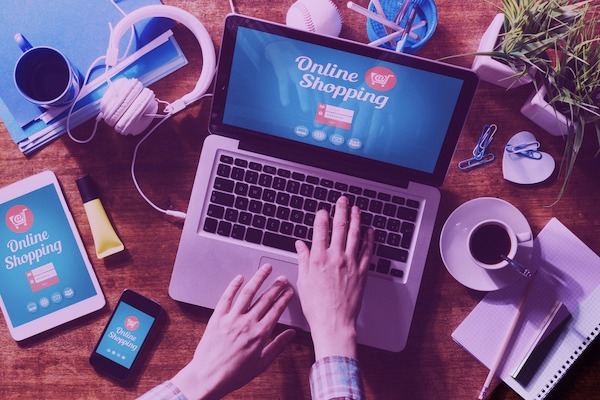

Bildquelle: [B1]

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# The following imports are necessary for the program to run

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # data visualization

import seaborn as sns # data visualization

# From Scikit-learn library; data modelling (e.g. implementing machine learning algorithms)
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import plot_roc_curve, precision_recall_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

# From yellowbrick; Data visualization
from yellowbrick.model_selection import ValidationCurve, FeatureImportances
from yellowbrick.classifier import DiscriminationThreshold

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-intention/online_shoppers_intention.csv


# 1. Allgemeine Informationen

## Projekt Online Shopper's Intention - Gruppe 2

**Anja & Mona**

Verwendeter Datensatz:
https://www.kaggle.com/roshansharma/online-shoppers-intention [1]

Source: 
* C. Okan Sakar, Department of Computer Engineering, Faculty of Engineering and Natural Sciences, Bahcesehir University, 34349 Besiktas, Istanbul, Turkey
* Yomi Kastro, Inveon Information Technologies Consultancy and Trade, 34335 Istanbul, Turkey


Aufgabenstellung: 
> The data consists of various Information related to customer behavior in online shopping websites. The goal is to classify if a user will generate revenue or not

# 2. Geschäftsverständnis

Unabhängig von der Art des Unternehmens ist es heute wichtiger als je zuvor auch online Vertreten zu sein, insbesondere ein Online-Shop kann den Umsatz eines Unternehmens steigern. Die meisten Zielgruppen nutzen das Internet und eine Webseite ist eine schnelle und günstige Möglichkeit eine große Menge Menschen zu erreichen. Allerdings reicht es bei weitem nicht aus sich mit WIX eine Webseite zu erstellen und dann zu hoffen, dass der Umsatz fließt. 

Zum einen kann der/ die Internet-Shopper:in online über das Produkt lesen und ist daher besser informiert als der/ die traditionelle Käufer:in. Dies gilt sowohl für die Produktspezifikation als auch für den Preis. Der/ die Online-Händler:in muss daher ebenso gut über die Konkurrenzprodukte informiert sein, um konkurrenzfähig bleiben zu können. [2]

Trotz dieser ganzen Informationsmöglichkeiten werden ein überwältigender Großteil (95 %) der Kaufentscheidungen unbewusst getroffen. So ist zum Beispiel neben dem Preis-Nutzen Verhältnis der erste Eindruck oft ausschlaggebend. Ist die Webseite schlecht gestaltet, passt sich nicht auf die Bildschirmgröße an, wirkt unprofessionell oder lässt sich nicht intuitiv navigieren dann sind Käufer:innen schnell wieder weg und auf der nächsten Webseite. (Stichwort: Bounce Rate) [3]

Überzeugt der Erste Eindruck, dann werden andere Leistungen der Online-Shopping Seite wichtig: Wie lange dauert die Lieferzeit, wie gut und flüssig läuft der Bestellvorgang, welche Zahlungsmethoden sind möglich, wie haben andere Kund:innen das Produkt oder den Onlineshop bewertet, wie einfach sind die Rückgabemöglichkeiten etc. [4]

Das türkische Start-Up "Amazonja" hat im letzten Jahr nicht so viel Umsatz generiert wie erhofft. Auf ihrer Webseite verkaufen und informieren sie über Süßwaren. Sie möchten gerne wissen, welche ihrer Kund:innen Umsatz generiert haben und welche nicht um in Zukunft informierte, datenbasierte Entscheidungen treffen zu können und was sie in Zukunft anders machen können. Glücklicherweise haben sie alle Bewegungen auf ihrer Webseite über Google Analytics getrackt, so dass die Daten nun zur Auswertung und Vorhersage genutzt werden können. Es folgt der Bericht der Beratungsfirma "SmartDataAM", die die vorhandenen Daten untersucht und mit ihnen eine Klassifikation erstellt hat, um vorherzusagen, welche:r Webseitenbesucher:in etwas kauft und welche:r nicht. Mit dieser Erkenntnis könnten in Zukunft informierte, datenbasierte Entscheidungen getroffen werden und zum Beispiel unentschlossene Besucher:innen gezielter durch Angebote gelockt werden.

(Geschäftsfall frei erfunden)

# 3. Datenverständnis (Exploratory Data Analysis)

## Beschreibung des Datensatzes

Es handelt sich bei den vorliegenden Daten um einen Strukturierten Datensatz aus der Türkei. Der Datensatz enthält 12330 Zeilen, die jeweils das Verhalten eine:r Nutzer:in über den Zeitraum von einem Jahr dokumentiert. Dieser Zeitraum wurde gewählt um Schwankungen durch spezielle Kampagnien, Jahreszeiten, besondere Tage während des Jahres auszugleichen.

Die 18 Spalten beinhalten folgende Informationen:

* 'Administrative' = Webseiten mit Administrativen Zweck, z.B. Login, Benutzerkonto einrichten/verwalten etc.
* 'Administrative_Duration' = Zeit die auf Administrativen Seiten verbracht wurde
* 'Informational'= Webseiten mit Informations Zweck, z.B. Produktbewertungen, Produktbeschreibungen etc.
* 'Informational_Duration' = Zeit die auf Informations Seiten verbracht wurde
* 'ProductRelated'= Webseite mit Produktbezogenen Inhalten, z.B. Produktgröße/Farbe/Form wählen etc.
* 'ProductRelated_Duration'= Zeit die auf Produktbezogenen Webseiten verbracht wurde
* 'BounceRates'= Prozentualer Anteil an E-commerce Webseitenbesucher:innen geöffnet und wieder geschlossen werden, ohne andere Handlungen auf der Seite durchzuführen, die Google Analytics misst.
* 'ExitRates'= Prozentualer Anteil an E-commerce Webseitenbesucher:innen die die Seite erst nach einer bestimmten Zeit wieder verlassen haben. (Gibt Aufschluss darüber, ob die Seite gefallen hat) [5] 
* 'PageValues'= Durchschnittswert für eine Seite, die ein Benutzer besucht hat, bevor er auf der Zielseite gelandet ist oder eine E-Commerce-Transaktion (oder beides) abgeschlossen hat. Dieser Wert soll eine Vorstellung davon geben, welche Seiten der Website zum Umsatz  beigetragen haben. Wenn die Seite in keiner Weise an einer E-Commerce-Transaktion für die Website beteiligt war, beträgt der Seitenwert für diese Seite 0 €, da die Seite in einer Session, in der eine Transaktion stattgefunden hat, nie besucht wurde. [6] 
* 'SpecialDay'= Zeigt an wie viele Tage/wie viel Zeit VOR einem besonderen Tag (Muttertag, Valentinstag) die Verkaufswahrscheinlichkeit am höchsten ist.
* 'Month'= Monat, hier vertretende Monate: Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep, Dec
* 'OperatingSystems'= Betriebssystem vom/von der Webseitenbesucher:in 
* 'Browser'= Browser vom/von der Webseitenbesucher:in
* 'Region'= Region aus der der/die Webseitenbesucher:in die Webseite aufruft
* 'TrafficType'= Unterscheidet *Direct traffic*, *Referring traffic* und *Search engine traffic*, also ob der/die Webseitenbesucher:in direkt über den URL, eine bookmark oder einen link in einer mail auf die Seite gelangt ist (=direct traffic), oder ob die Person über einen Link einer anderen Seite auf die Webseite gelangt ist (=referring traffic) oder ob die Seite über eine Suchmaschine gefunden wurde (=search engine traffic) [7] 
* 'VisitorType'= Types of Visitor: Returning_VIsitor, New_Visitor, Other
* 'Weekend'= Zeigt an, ob der/die Webseitenbesucher:in am Wochenende auf der Webseite war (=True) oder unter der Woche (=False)
* 'Revenue'= Zeigt an, ob der/die Webseitenbesucher:in Umsatz generiert hat(=True) oder nicht (=False)



Quelle zum Datensatz:  [1]

## Daten importieren

In [2]:
# import csv()
df = pd.read_csv("../input/online-shoppers-intention/online_shoppers_intention.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Mithilfe von .info() bekommen wir einen ersten Überblick über die Daten. 

Datentypen
* Datentyp object: 2x
* Datentyp bool: 2x
* Datentyp int: 4x
* Datentyp float: 10x

In [4]:
df.head()              # Ersten fünf Zeilen des Datensatzes

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.tail()              # Letzten fünf Zeilen des Datensatzes

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## Daten-Visualisierung

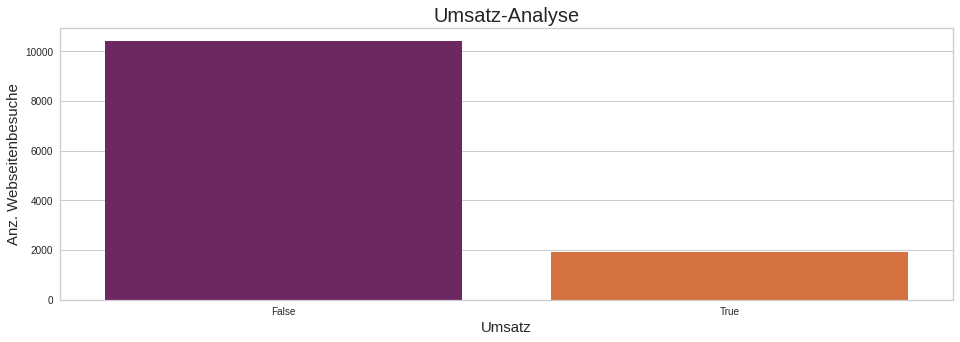

In [6]:
# Wie viele der Webseitensbesuche generieren Umsatz?
plt.figure(figsize=(16,5))
sns.countplot(df['Revenue'], palette = 'inferno')
plt.ylabel('Anz. Webseitenbesuche', fontsize = 15);
plt.xlabel('Umsatz', fontsize = 15);
plt.title('Umsatz-Analyse', fontsize = 20);

Nur etwa 2000 der 12330 Besucher:innen kaufen etwas auf der Webseite, das entspricht ca. 16 %.

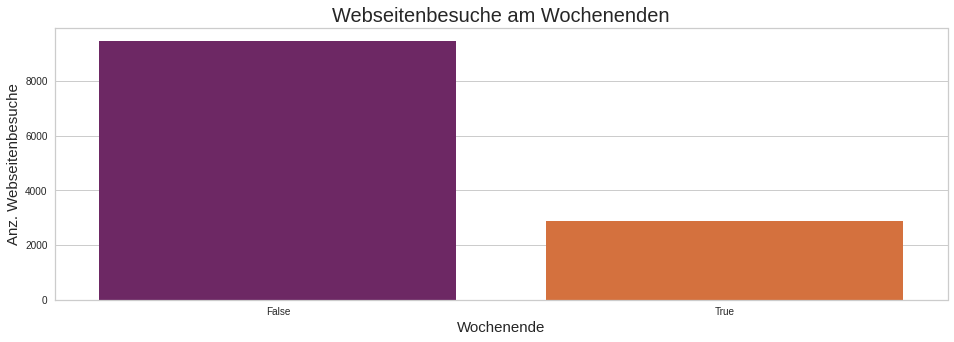

In [7]:
# Wie viele der Webseitensbesuche finden am Wochenende statt?
plt.figure(figsize=(16,5));
sns.countplot(df['Weekend'], palette = 'inferno');
plt.ylabel('Anz. Webseitenbesuche', fontsize = 15);
plt.xlabel('Wochenende', fontsize = 15);
plt.title('Webseitenbesuche am Wochenenden', fontsize = 20);

Die meisten Webseitenbesuche finden unter der Woche statt. Da der Anteil der Webseitenbesuche am Wochenende ca 2/7 der Gesamtmenge einnimmt, lässt sich vermuten, dass die Anzahl der Webseitenbesuche über die Wochentage gleich verteilt sind.

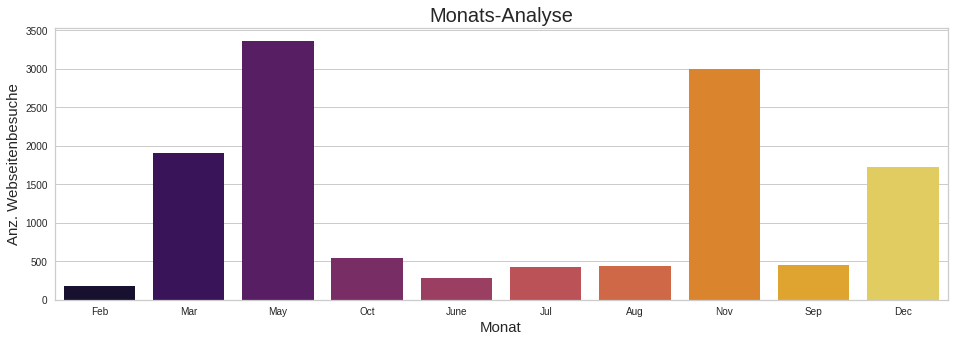

In [8]:
# Verteilung der Aktivitäten nach der Spalte Month
plt.figure(figsize=(16,5))
sns.countplot(x='Month', data=df, palette='inferno');
plt.ylabel('Anz. Webseitenbesuche', fontsize = 15);
plt.xlabel('Monat', fontsize = 15);
plt.title('Monats-Analyse', fontsize = 20);

Die Monate März, Mai, November und Dezember stechen deutlich hervor, in diesen Monaten gab es demnach mehr Webseitenbesuche.
Auffällig an dieser Grafik ist, dass die Monate nicht geordnet sind und zwei Monate (Januar und April) fehlen. 

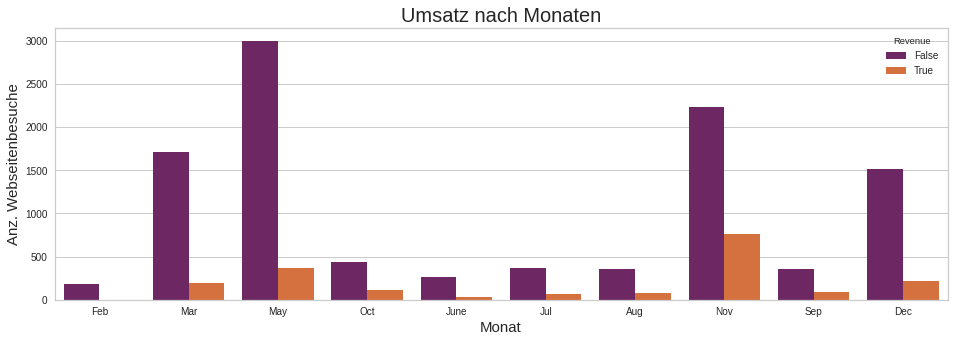

In [9]:
# Verteilung des Umsatzes nach Monaten
plt.figure(figsize=(16,5))
sns.countplot(df['Month'],hue=df['Revenue'], palette='inferno');
plt.ylabel('Anz. Webseitenbesuche', fontsize=15);
plt.xlabel('Monat', fontsize = 15);
plt.title('Umsatz nach Monaten', fontsize=20);

Die Monate März, Mai, November und Dezember sind am umsatzstärksten. Dies passt zu der Erkenntnis, dass es in diesen Monaten mehr Webseitenbesuche gab.
Marketingkampagnen und Aktionen könnten in den umsatzschwächeren Monaten helfen den Umsatz zu steigern.

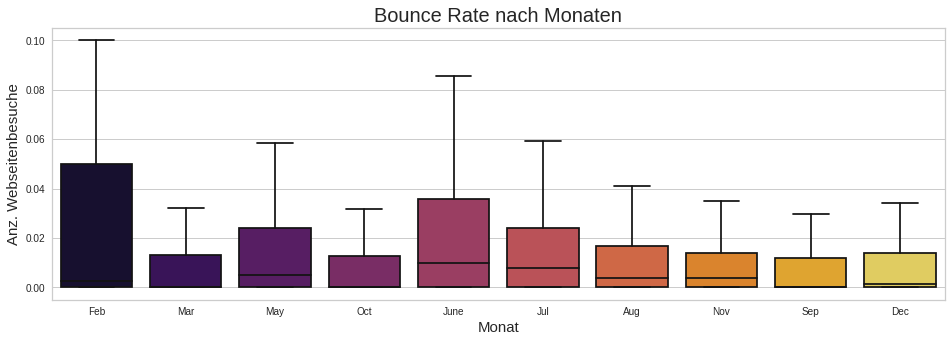

In [10]:
# Verteilung der Bounce Rate nach Monaten
plt.figure(figsize=(16,5))
sns.boxplot(data=df,x='Month', y='BounceRates', palette='inferno', showfliers=False);
plt.ylabel('Anz. Webseitenbesuche', fontsize=15);
plt.xlabel('Monat', fontsize = 15);
plt.title('Bounce Rate nach Monaten', fontsize=20);

Die Bounce Rate verhält sich nicht analog zu der Monats-Analyse darüber. Weitere Schlüsse lassen sich hieraus erstmal nicht ziehen.

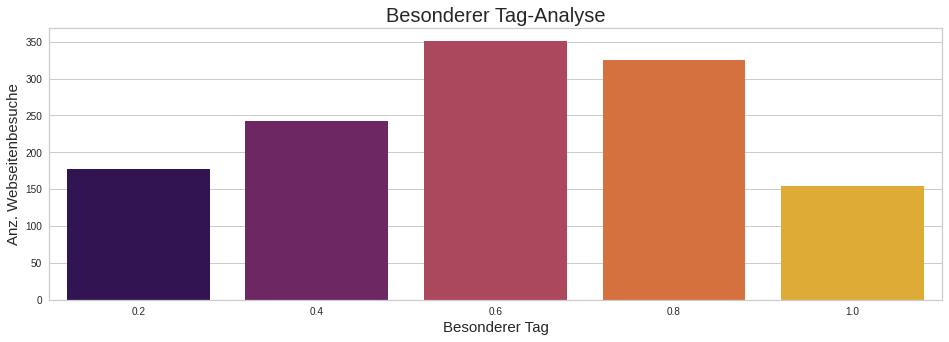

In [11]:
# Verteilung des Umsatz nach der Spalte SpecialDay

# Schließe 0-Werte aus der Spalte aus
df_sd = df['SpecialDay']
df_sd = df_sd.replace(0, np.nan)
df_sd = df_sd.dropna()

plt.figure(figsize=(16,5))
sns.countplot(x= df_sd, data=df, palette='inferno');
plt.ylabel('Anz. Webseitenbesuche', fontsize = 15);
plt.xlabel('Besonderer Tag', fontsize = 15);
plt.title('Besonderer Tag-Analyse', fontsize = 20);

Die Spalte "SpecialDay" untersucht die Anzahl der Webseitenbesuche vor einem besonderen Tag. 10 Tage vor einem "besonderen Tag" (z.B. Valentinstag, Muttertag) fängt es an mehr Webseitenbesuche zu geben, der Höhepunkt ist bei 6 Tagen vor dem besonderen Tag erreicht, danach flacht es wieder ab.

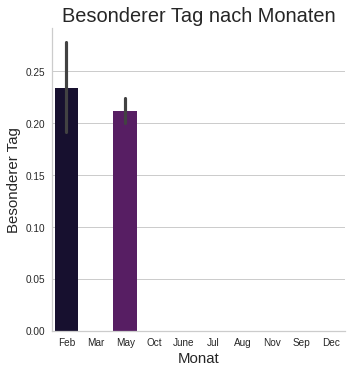

In [12]:
# Verteilung der besonderen Tage nach Monaten
sns.catplot(data=df, x='Month', y='SpecialDay', kind='bar', palette='inferno');
plt.ylabel('Besonderer Tag', fontsize=15);
plt.xlabel('Monat', fontsize=15);
plt.title('Besonderer Tag nach Monaten', fontsize=20);
plt.show();

Im Februar und Mai gibt es besondere Tage in der Türkei.

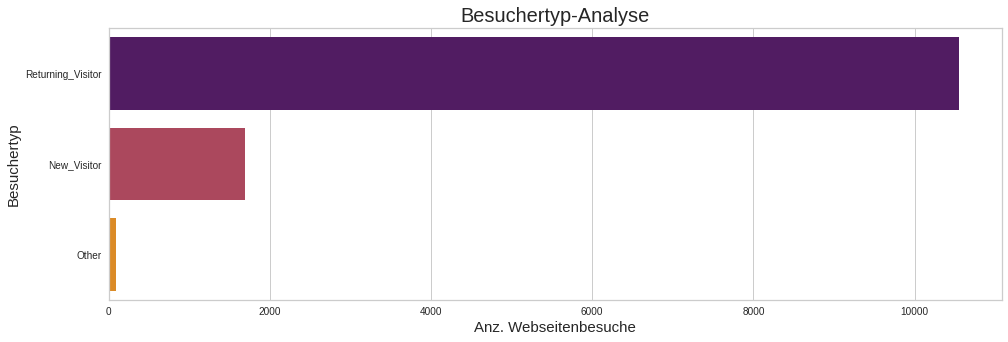

In [13]:
# Verteilung der Kund:innen basierend auf dem Besuchertyp
plt.figure(figsize=(16,5))
sns.countplot(y='VisitorType', data=df, palette='inferno');
plt.xlabel('Anz. Webseitenbesuche', fontsize = 15);
plt.ylabel('Besuchertyp', fontsize = 15);
plt.title('Besuchertyp-Analyse', fontsize = 20);

Die meisten Webseitenbesucher:innen sind wiederkehrende Besucher:innen, weniger als 16 % sind Neukund:innen. Die Webseite scheint eine gute Kundenbindung zu haben, aber wenig Neukunden anzuziehen. Marketingaktionen und Angebote speziell für Neukund:innen könnten helfen die Quote zu steigern.

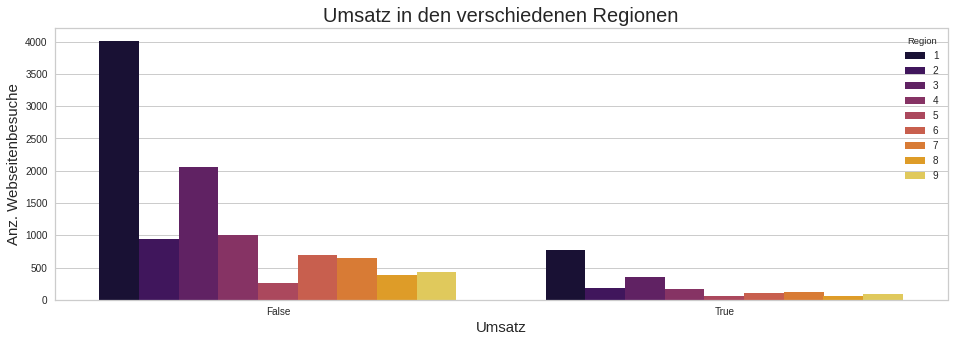

In [14]:
# Generierter Umsatz in den verschiedenen Regionen
plt.figure(figsize=(16,5))
sns.countplot(df['Revenue'],hue=df['Region'], palette='inferno');
plt.ylabel('Anz. Webseitenbesuche', fontsize=15);
plt.xlabel('Umsatz', fontsize = 15);
plt.title('Umsatz in den verschiedenen Regionen', fontsize=20);

Ob ein:e Webseitenbesucher:in Umsatz generiert oder nicht, ist nicht von der Region abhängig.

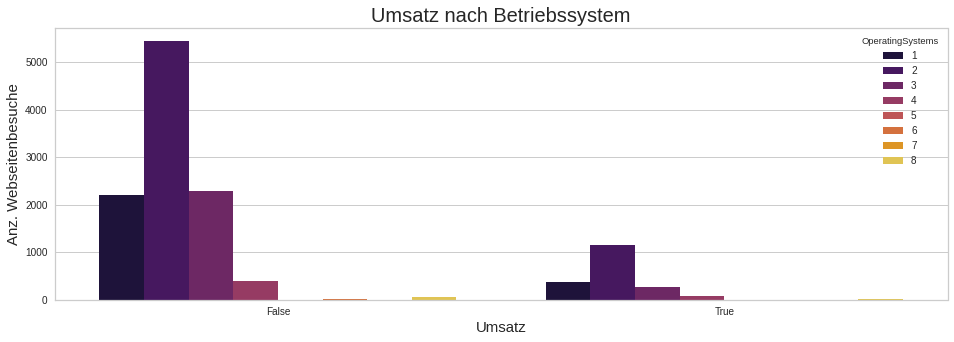

In [15]:
# Generierter Umsatz in Abhängigkeit vom Betriebssystem
plt.figure(figsize=(16,5))
sns.countplot(df['Revenue'],hue=df['OperatingSystems'], palette='inferno');
plt.ylabel('Anz. Webseitenbesuche', fontsize=15);
plt.xlabel('Umsatz', fontsize = 15);
plt.title('Umsatz nach Betriebssystem', fontsize=20);

Ob ein:e Webseitenbesucher:in Umsatz generiert oder nicht, ist nicht vom Betriebsystem abhängig.

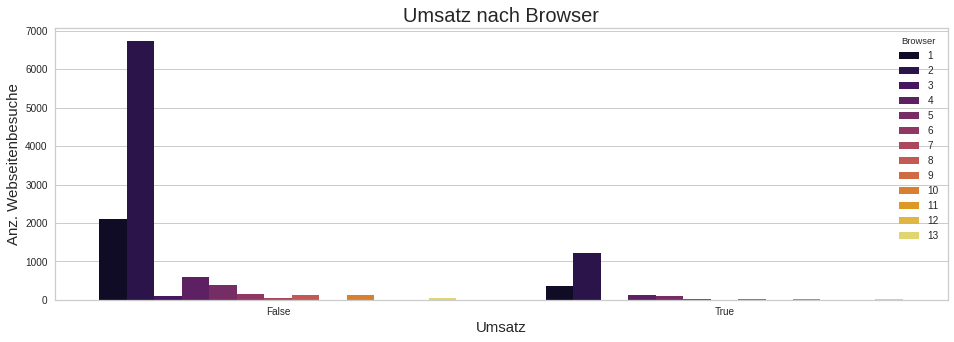

In [16]:
# Generierter Umsatz in Abhängigkeit vom Browser
plt.figure(figsize=(16,5))
sns.countplot(df['Revenue'],hue=df['Browser'], palette='inferno');
plt.ylabel('Anz. Webseitenbesuche', fontsize=15);
plt.xlabel('Umsatz', fontsize = 15);
plt.title('Umsatz nach Browser', fontsize=20);

Ob ein:e Webseitenbesucher:in Umsatz generiert oder nicht, ist nicht vom Browser abhängig.

## Analyse von fehlenden Daten

In [17]:
# Wie viele & welche Daten fehlen?
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Die vorliegenden Daten sehen sehr vollständig aus, es fehlen lediglich in den ersten sieben Spalten jeweils 14 Daten. 
Es sind also maximal 8x14 = 112 Datensätze unvollständig, was weniger als 1% der gesamten Datenmenge entspricht. 

# 4. Datenaufbereitung

## Feature Auswahl

### Was sind Features und Label?

"Beim machine learning und bei der pattern recognition ist ein feature eine individuell messbare Eigenschaft eines beobachteten Phänomens."[8] 

Beispiel: Wenn wir einem Menschen ein Möbelstück zeigen und ihn fragen, um welches Möbelstück es sich handelt, dann wird der Mensch anhand der Eigenschaften (= Features) erkennen können um welches es sich handelt. Zum Beispiel sieht er/sie vier Beine, eine Rückenlehne, eine Sitzfläche, also ist das Möbelstück ein Stuhl. In diesem Beispiel sind die vier Beine, die Sitzfläche und die Rückenlehne die Features und das Ergebnis "Stuhl" das Label, was der Mensch dem Möbelstück gibt.
* Features = predictor variables = independent variables
* Label = target variable = response variable = dependent variable

### Features für die Analyse
Die Datenvisualisierung hat gezeigt, dass die Spalten Weekend, Region, OperatingSystem und Browser keine Auswirkung auf den Umsatz haben, daher werden diese als Features aussortiert.

Features & Labels für unsere Daten:
* Features: 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'Region', 'TrafficType', 'VisitorType'
* Label: 'Revenue'

Es wurden keine neuen Features abgeleitet.

Inhalt der Spalten (siehe oben unter 3. "Beschreibung des Datensatzes")

In [18]:
# Löschen von unrelevanten Features
columns_to_drop = ['Weekend','OperatingSystems', 'Browser', 'Region']
df_clean = df.drop(columns = columns_to_drop)

df_clean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,TrafficType,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,Returning_Visitor,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,Returning_Visitor,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,3,Returning_Visitor,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,4,Returning_Visitor,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,4,Returning_Visitor,False


## Umgang mit fehlenden Daten (Löschen oder Imputation)

Es gibt zwei Varianten mit fehlenden Daten umzugehen:
1. Die Datensätze mit den fehlenden Daten können mit .drop() gelöscht werden. Sollten jedoch zu viele Werte fehlen, ist es möglich, dass nicht genug Daten für eine gute Klassifikation übrig bleiben.
2. Die fehlenden Werte können mit dem Median, dem Durchschnittswert oder dem am häufigsten vorkommendem Wert der anderen Datensätze aufgefüllt werden, diese Vorgehensweise nennt man Imputation. Somit muss auf keine Datensätze verzichtet werden. Werden jedoch zu viele Spalten mit dieser Variante aufgefüllt, kann die spätere Klassifikation ungenaue Ergebnisse liefern.

In [19]:
# Wie viele & welche Daten fehlen jetzt noch?
df_clean.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
TrafficType                 0
VisitorType                 0
Revenue                     0
dtype: int64

In [20]:
# Löschen
df_drop_all = df_clean.dropna() 
df_drop_all.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  float64
 10  Month                    12316 non-null  object 
 11  TrafficType              12316 non-null  int64  
 12  VisitorType              12316 non-null  object 
 13  Revenue                  12316 non-null  bool   
dtypes: bool(1), float64(10

Es sind die gleichen Zeilen in denen Daten fehlen, es werden hier also tatsächlich nur 14 Datensätze gelöscht.

In [21]:
# Imputation
df_drop=df_clean[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']].mean()
df_clean[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']] = df_clean[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates']].fillna(df_drop)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  TrafficType              12330 non-null  int64  
 12  VisitorType              12330 non-null  object 
 13  Revenue                  12330 non-null  bool   
dtypes: bool(1), float64(10

Es wird mit dem durch die Imputation aufgefüllten DataFrame "df_clean" fortgefahren.

## Transformation von nicht-numerischen Daten

Die Spalte "Revenue" hat boolsche Werte, die Spalte "Month" und "VisitorType" sind objects. Da für das Machine Learning aber Zahlen benötigt werden, müssen die Werte dieser Spalten in numerische Werte umgewandelt werden.

In [22]:
le = LabelEncoder()

df_cleaned = df_clean
df_cleaned.Month = le.fit_transform(df_cleaned.Month)                # Dezember =1, Februar = 2, [...] November = 7     
df_cleaned.VisitorType = le.fit_transform(df_cleaned.VisitorType)    # NewVisitor = 0, Other =1 ReturningVisitor =2
df_cleaned.Revenue = le.fit_transform(df_cleaned.Revenue)            # False = 0, True =1
df_cleaned

# Quelle: [9]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,TrafficType,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,2,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,3,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,4,2,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1,1,2,0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,7,8,2,0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,7,13,2,0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,7,11,2,0


## Teilen der Daten in Trainings- Validierungs- und Testsätze

Der Datensatz wird in zwei oder mehr Sets gespalten um nach dem Training des Algorithmus den Klassifikator auf seine Genauigkeit und Effizienz evaluieren zu können. 

Hierfür gibt es zwei Optionen:
1. Splitten des Datensatzes in Trainings- und Testdatensätze
2. Splitten des Datensatzes in Trainings-, Validierungs- und Testdatensätze  (Diese Variante wird hier angewand und der Testdatensatz als Holdout-Datensatz behandelt)

In [23]:
# X wird mit den Features initalisiert, y mit den Labels
X = df_cleaned.drop(columns='Revenue')   # X = Features (großes X für Matrix)
y = df_cleaned['Revenue']                # Labels (Vektor)

feature_names = list(X.columns)
class_names = list(y.unique())
print(feature_names)
print(class_names)

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'TrafficType', 'VisitorType']
[0, 1]


In [24]:
# Der komplette Datensatz wird in Trainings- und Testdatensätze geteilt
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [25]:
print(len(X_train))
print(len(X_val))

9864
2466


In [26]:
# Der Trainings-Datensatz wird ein weiteres Mal in Trainings- und Validierungsdatensätze geteilt
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42) 

# Quelle: [10]

In [27]:
print(len(X_train))
print(len(X_test))

7891
1973


Nach den beiden Splits ist der Datensatz wie folgt aufgeteilt:
* Trainingsdatenset: 7891 Zeilen = 64 %
* Validierungsdatenset: 2466 Zeilen = 20 %
* Testdatenset: 1973 Zeilen = 16 %   (= Holdout Set )

y_test.value_counts()

### Verkürze Test Set soweit, dass die Aufteilung, ob Revenue erzeugt wird oder nicht bei 50/50 liegt
test=shuffle(df_cleaned[df_cleaned['Revenue']==1].sample(n=304).append(df_cleaned[df_cleaned['Revenue']==0].sample(n=304))).reset_index(drop=True)

X_test = test.drop(columns='Revenue')
y_test = test['Revenue']

test_feature_names = list(X.columns)
test_class_names = list(y.unique())
print(test_feature_names)
print(test_class_names)


*Anmerkung: Diese Verkürzung hatten wir in der Entwicklung genutzt um zu sehen, wie gut unsere Algorithmen Kaufentscheidungen vorhersagen, wenn die Aufteilung 50/50 (Kauf/Kein Kauf) ist. Da diese Aufteilung aber nicht die Realität wiederspiegelt, haben wir sie am Ende auskommentiert.*

# 5. Modellbildung

### Es werden folgende Machine Learning-Modelle verglichen:

* (Dummy Classifier als Baseline)

* K-Nearest Kneighbors

* Decision Tree

* Random Forest



# 5.1 Dummy Classifier als Baseline

Wie die Visualisierung der Daten gezeigt hat, erbringt der Großteil der Aktivitäten auf der Webseite keinen Umsatz. Daher ist es sinnvoll zunächst einen Dummy Classifier zu erzeugen, um zu sehen wie gut die Erfolgsrate mindestens sein sollte. 

Beispiel: Wenn von 100 Menschen 90 rechtshändig sind, dann sagt der Dummy Classifier bei allen 100 vorher, dass sie rechtshändig sind und hat damit eine Accuracy von 90 %. 

Die Accuracy vom Dummy Classifier ist das schlechteste Ergebnis, dass die anderen Classifier mindestens überbieten müssen.

In [28]:
# Initialisierung von dummy_clf mit dem DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

In [29]:
# Trainieren des Algorithmus mit den Trainingsdaten
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [30]:
# Prediction / Vorhersage der Validierungsdaten, ob Umsatz generiert wird oder nicht
y_pred = dummy_clf.predict(X_val)

### Classification Report

Der Classification Report bietet eine Übersicht über wichtige Kennzahlen, wie gut der jeweilige Algorithmus wirklich ist. Er eignet sich daher gut, um die verschiedenen Modelle miteinander zu vergleichen. 

Die Kennzahlen:
* Precision = Maß für die Genauigkeit des Klassifikators. "Wie oft ist die Vorhersage prozentual richtig, wenn die Vorhersage lautet: "Umsatz"?"
* Recall = Maß für die Vollständigkeit des Klassifikators. "Wie viele von den in Wirklichkeit positiven (=Umsatz) wurden prozentual positiv vorhergesagt?"
* F1-Score = gewichtetes harmonisches Mittel aus Precision und Recall und daher niedriger als die Accuracy. Der beste Wert ist 1,0, der schlechteste 0,0.
* Support = Anzahl der tatsächlichen Vorkommen der Klasse im angegebenen Datensatz.

Wie die Kennzahlen berechnet werden, wird im weiteren Verlauf gezeigt.


Quelle: [11]

In [31]:
# Classification report für Dummy Classifier
print(metrics.classification_report(y_val, y_pred, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3));

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.833     1.000     0.909      2055
 Vorhersage: Kauft etwas      0.000     0.000     0.000       411

                accuracy                          0.833      2466
               macro avg      0.417     0.500     0.455      2466
            weighted avg      0.694     0.833     0.758      2466



Der Dummy-Classifier guckt sich nur die most_frequent Werte (= Kein Umsatz) an, die in unserem Trainingssatz 83,3 % der Aktivitäten ausmachen.

### Receiver Operating Characteristic Curve (ROC) & Area Under the Curve (AUC)

Die ROC Kurve zeigt den „Trade-off“ zwischen der True-Positive und der False-Positive Rate. (Kompromiss zwischen Sensitivität und Spezifität)
Je näher die Kurve dem linken Rand und dann dem oberen Rand des ROC-Raums folgt, desto genauer ist das Modell. Die schlechteste Kurve ist eine 45-Grad-Diagonale.
Mithilfe der Kurve kann die Entscheidung getroffen werden, welches Verhältnis der beiden Raten gewünscht und möglich ist.

Die AUC (=Fläche unter der Kurve) ist ein Maß für die Modellgenauigkeit. (Accuracy)



Quelle: [12]

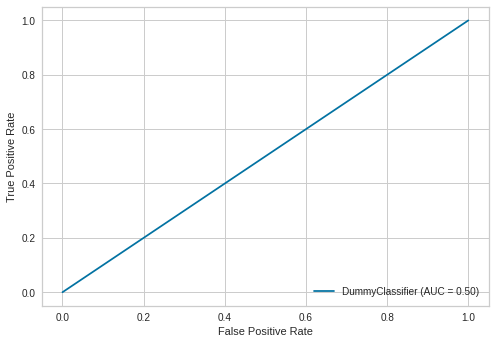

In [32]:
# Visualisierung ROC Curve Dummy Classifier
plot_roc_curve(dummy_clf, X_test, y_test);

Die AUC beträgt für den Dummy Classifier 0,5. Dies ist das schlechtmöglichste Ergebnis, das die ROC Kurve anzeigen kann und bedeutet, dass das Modell keine Unterscheidung macht zwischen positiver (=Kauf) und negativer (=Kein Kauf) Klasse.

# 5.2 K-NEAREST NEIGHBORS

KNN ist ein simpler, robuster und überwachter Machine-Learning Algorithmus, der sowohl für Klassifikationen als auch für Regressionen verwendet werden kann. Der Grundgedanke des Algorithmus ist es, dass wenn man Elemente in einem n-dimensionalen Vektorraum plottet (n= Dimension des Eingabevektors), ähnliche Elemente nahe beieinander liegen. 
Möchte man nun ein Element klassifizieren, schaut der Algorithmus sich eine vorher festgelegte Anzahl an umliegenden Nachbarn an und gibt dem Element dann das gleiche Label. [13] 

Beispiel: 
Im Bild sind verschiedenfarbige Elemente zu sehen, es soll die Farbe des Sterns bestimmt werden.
Im Bild ganz links wird die Farbe des Sterns anhand eines einzigen Nachbarn klassifiziert. Der nächste Nachbar zum Stern ist rot, daher wird der Stern auch als rot klassifiziert. 
Im mittleren Bild wird die Farbe des Sterns anhand von den 9 nächsten Nachbarn klassifiziert. Die Mehrheit davon ist blau, daher wird der Stern hier als blau klassifiziert. 
Im Bild rechts wird die Farbe des Sterns sogar anhand von 25 nächsten Nachbarn klassifiziert, wobei das Ergebnis hier wieder blau ist.

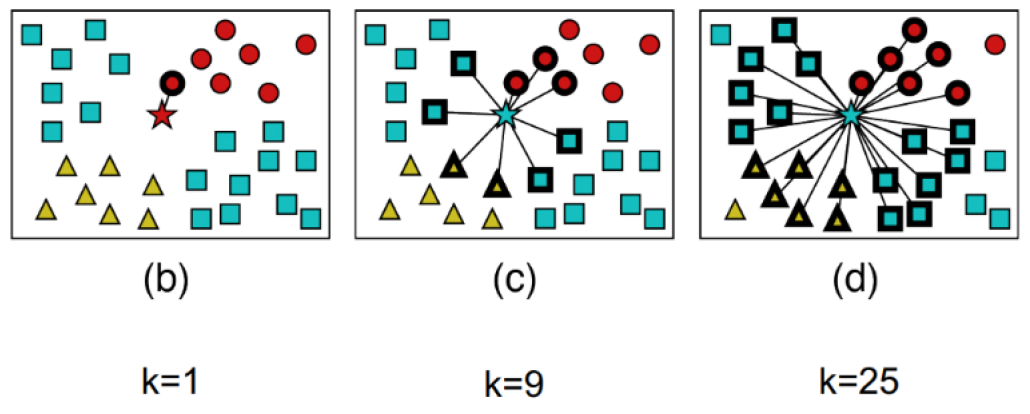



Bildquelle: [B2]

## Hyperparameteroptimierung mithilfe der GridSearch
  
### Was sind Hyperparameter?
Hyperparameter sind die externen Stellschrauben des Algorithmus, die schon bei der Initialisierung festgelegt werden müssen und vom Algorithmus nicht geändert werden können. [14] [15]

Beispiel:
* Anzahl an Nachbarn beim KNN Algorithmus
* Tiefe des Baumes beim Decision Tree Algorithmus

### Was ist der Unterschied zu Parametern?
Paramater sind die internen Stellschrauben eines Algorithmus, die genutzt werden um das Modell während der Trainingsphase auf die Daten anzupassen. [14] [15]

Beispiel:
* Split von bestimmten Attributen beim Decision Tree Algorithmus

Hyperparameter sind also die Parameter die auf einer übergeordneten Ebene bestimmen, wie der Algorithmus seine Parameter findet.

### Warum optimiert man Hyperparameter?
Hyperparameter sind entscheidend für die Leistung, Geschwindigkeit und Qualität der der Modelle.

### Wie werden Hyperparameter optimiert?
Die Hyperparameter werden mithilfe von der GridSearch optimiert

### Hyperparameter für KNN: 
* n_neighbors
* weights
* metric

In [33]:
# Die Hyperparameter die wir uns für den K-Nearest Neighbors Algorithmus ansehen, sind *n_neighbors*, *weights* und *metric*
knn = KNeighborsClassifier()

paramsKNN = {'n_neighbors': np.arange(1,15,1),       # Anzahl der Nachbarn die für die Bewertung mit einbezogen werden
             'weights': ['uniform', 'distance'],     # Gewichtung der Nachbarn
             'metric' : ['manhattan', 'euclidean'] } # Auswahl der Abstandsfunktion


knn_grid_clf = GridSearchCV(estimator = knn,          # KNeighborsClassifier wird übergeben
                            param_grid = paramsKNN,   # Hyperparameter werden übergeben
                            scoring = 'accuracy',     # Scoring Parameter, bestimmt welche Kennzahl für die Evaluation genutzt wird
                            verbose = 1,              # Um so größer die Zahl um so mehr Details/Nachrichten werden angezeigt
                            cv = 5,                   # Cross-Validation = 5
                            n_jobs = -1 )             # -1 = Computer soll alle Prozessoren zur Berechnung nutzen

knn_grid_clf.fit(X_train, y_train)

# Quellen: [16][17]

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   12.3s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [34]:
# Alle Ergebnisse aus jedem Split
df_cv_results = pd.DataFrame(knn_grid_clf.cv_results_)
print(df_cv_results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
0       0.035819      0.002474         0.125627        0.006859    manhattan   
1       0.034121      0.000749         0.043084        0.003187    manhattan   
2       0.033886      0.001623         0.128423        0.002946    manhattan   
3       0.034050      0.001669         0.047580        0.002740    manhattan   
4       0.035091      0.002485         0.132782        0.001646    manhattan   

  param_n_neighbors param_weights  \
0                 1       uniform   
1                 1      distance   
2                 2       uniform   
3                 2      distance   
4                 3       uniform   

                                              params  split0_test_score  \
0  {'metric': 'manhattan', 'n_neighbors': 1, 'wei...           0.831539   
1  {'metric': 'manhattan', 'n_neighbors': 1, 'wei...           0.831539   
2  {'metric': 'manhattan', 'n_neighbors': 2, 'wei...           0.859405

In [35]:
# Relevanten Spalten aus jedem Split
print(df_cv_results[['param_metric', 'param_n_neighbors', 'param_weights', 'mean_test_score']])

   param_metric param_n_neighbors param_weights  mean_test_score
0     manhattan                 1       uniform         0.838298
1     manhattan                 1      distance         0.838298
2     manhattan                 2       uniform         0.866051
3     manhattan                 2      distance         0.838298
4     manhattan                 3       uniform         0.864531
5     manhattan                 3      distance         0.864024
6     manhattan                 4       uniform         0.865671
7     manhattan                 4      distance         0.862123
8     manhattan                 5       uniform         0.866431
9     manhattan                 5      distance         0.865798
10    manhattan                 6       uniform         0.864784
11    manhattan                 6      distance         0.863770
12    manhattan                 7       uniform         0.862883
13    manhattan                 7      distance         0.863516
14    manhattan          

In [36]:
# Besten Grid Search Ergebnisse für KNN
opt_knn_clf = knn_grid_clf.best_params_

print("Die optimierten Hyperparameter für KNN sind: ")
for key, value in opt_knn_clf.items():
    print("     - "+key+": "+str(value))
    
print("Die höchste Accuracy aufgrund der Trainingsdaten mit diesen Hyperparametern liegt bei: ", knn_grid_clf.best_score_)

Die optimierten Hyperparameter für KNN sind: 
     - metric: euclidean
     - n_neighbors: 4
     - weights: uniform
Die höchste Accuracy aufgrund der Trainingsdaten mit diesen Hyperparametern liegt bei:  0.8704862858606024


In [37]:
# Optimierten Hyperparameter werden an opt_knn_clf übergeben
opt_knn_clf = knn_grid_clf.best_estimator_

## Optimierter Klassifikator auf allen Trainingsdaten neu trainieren

In [38]:
# Trainieren des Algorithmus mit den Trainingsdaten
opt_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [39]:
# Prediction / Vorhersage der Trainingsdaten, ob Umsatz generiert wird oder nicht
train_opt_knn_clf = opt_knn_clf.predict(X_train)
print(train_opt_knn_clf[0:25])

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [40]:
# Probability / Wahrscheinlichkeit, ob der jeweilige Datensatz/Webseitenbesucher:in Umsatz erbringt oder nicht aufgrund der Trainingsdaten
train_pred_proba_knn = opt_knn_clf.predict_proba(X_train)
print(train_pred_proba_knn[0:25])

[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.75 0.25]
 [1.   0.  ]
 [0.75 0.25]
 [0.5  0.5 ]
 [0.25 0.75]
 [1.   0.  ]
 [0.75 0.25]
 [0.75 0.25]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.5  0.5 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.5  0.5 ]
 [0.   1.  ]]


## Evaluation des Modells anhand von Kennzahlen 

Vorlage für Vorgehensweise bei folgender Evaluierung: [18]

In [41]:
# Prediction / Vorhersage der Validierungsdaten, ob Umsatz generiert wird oder nicht
val_opt_knn_clf = opt_knn_clf.predict(X_val)

### Confusion Matrix

Mithilfe der Confusion Matrix bekommt man leicht und schnell einen Überblick darüber, wie viele Labels richtig und wie viele falsch vorhergesagt wurden. Die eine Seite der Matrix zeigt die „Predicted Label“ an, also die Werte, die mit dem Klassifikator vorhergesagt wurden und die andere Seite zeigt die „True Label“ an, also welche Werte die Labels in Wirklichkeit hatten. 

Daraus ergeben sich in diesem Fall vier Felder:
* Links oben: True Negative, hier sind alle Labels die richtigerweise als 0 / „Kein Kauf“ vorhergesagt wurden
* Rechts oben: False Positive, hier sind alle Labels die fälschlicherweise als 1 / „Kauf“ vorhergesagt wurden
* Links unten: False Negative, hier sind alle Labels die fälschlicherweise als 0 / „Kein Kauf“ vorhergesagt wurden
* Rechts unten: True Positive, hier sind alle Labels die richtigerweise als 1 / „Kauf“ vorhergesagt wurden.


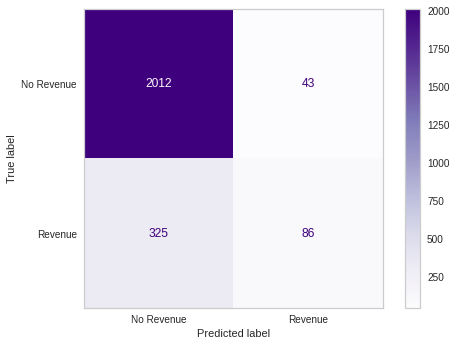

In [42]:
# Confusion Matrix Model aufgrund der Validierungsdaten
cm = metrics.confusion_matrix(y_val, val_opt_knn_clf)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No Revenue', 'Revenue'])
disp.plot(cmap="Purples")
plt.grid(False)

Die True-Positive und False-Negative Raten sind sehr hoch. Der Klassifikator sagt also in den meisten Fällen "Kein Kauf" vorher. 

In [43]:
# Die vier Werte aus der Confusion Matrix werden einzeln gespeichert
confusion = metrics.confusion_matrix(y_val, val_opt_knn_clf)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [44]:
# Classification Accuracy: Wie oft liegt der Klassifikator prozentual richtig?
print ((TP+TN) /float(TP+TN+FP+FN))

0.8507704785077048


In [45]:
# Classification Error: Wie oft liegt der Klassifikator prozentual falsch?
print ((FP+FN) /float(TP+TN+FP+FN))

0.1492295214922952


In [46]:
# Precision/Positiver Vorhersagewert/Genauigkeit: Wie oft ist die Vorhersage prozentual richtig, wenn die Vorhersage lautet: "Umsatz"? 
print(TP/float(TP+FP))

0.6666666666666666


In [47]:
# Recall/Sensitivität/Sensitivity/Richtig-positiv-Rate/Trefferquote: Wie viele von den in Wirklichkeit positiven (=Umsatz) wurden prozentual positiv vorhergesagt?
print (TP / float(TP+FN))

0.20924574209245742


In [48]:
# Spezifität/Specificity/Richtig-negativ-Rate: Wie viele von den in Wirklichkeit negativen (=Kein Umsatz) wurden prozentual negativ vorhergesagt?
print(TN / float(TN+FP))

0.9790754257907542


In [49]:
# Falsch Positiv Rate: Wie oft ist die Vorhersage prozentual falsch, wenn die Vorhersage lautet: "Kein Umsatz"
print(FP/float(TN+FP))

0.020924574209245744


In [50]:
# Classification Report für Trainings- und Validierungsdaten
print(metrics.classification_report(y_train, train_opt_knn_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_opt_knn_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.895     0.992     0.941      6698
 Vorhersage: Kauft etwas      0.889     0.344     0.496      1193

                accuracy                          0.894      7891
               macro avg      0.892     0.668     0.718      7891
            weighted avg      0.894     0.894     0.874      7891

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.861     0.979     0.916      2055
 Vorhersage: Kauft etwas      0.667     0.209     0.319       411

                accuracy                          0.851      2466
               macro avg      0.764     0.594     0.617      2466
            weighted avg      0.829     0.851     0.817      2466



Die Accuracy für das KNN-Modell liegt bei den Trainings- und Validierungsdaten jeweils im hohen 80%-Bereich. Das liegt aber vor allem daran, dass der Datensatz unausgeglichen ist und die große Mehrheit nichts kauft, was auch korrekt vorhergesagt wird. 
Da aber vor allem herausgefunden werden soll, welche Webseitenbesucher:innen etwas kaufen, ist es erforderlich den Recall-Wert für die Vorhersage "Kauft etwas" zu erhöhen, da lieber unentschlossene Webseitenbesucher:innen zu den Kund:innen gezählt werden sollen, als echte Kund:innen zu übersehen.
Zudem soll herausgefunden werden, ob die Hyperparameter aus der GridSeach auch für neue Daten optimal sind.

## Hyperparamter kontrollieren & anpassen

Kleinste Fehlerrate:- 0.14476885644768855 bei K = 9


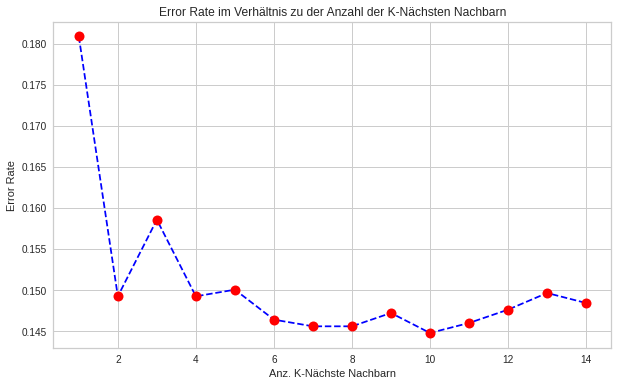

In [51]:
# Error Rate im Verhältnis zu der Anzahl der K-Nächsten Nachbarn

error_rate = []
for i in range(1,15,1):
 knn_ks = KNeighborsClassifier(metric='euclidean', weights = 'uniform', n_neighbors=i).fit(X_train,y_train)
 pred_i = knn_ks.predict(X_val)
 error_rate.append(np.mean(pred_i != y_val))

plt.figure(figsize=(10,6))
plt.plot(range(1,15,1),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10);
plt.title('Error Rate im Verhältnis zu der Anzahl der K-Nächsten Nachbarn')
plt.xlabel('Anz. K-Nächste Nachbarn');
plt.ylabel('Error Rate');
print("Kleinste Fehlerrate:-",min(error_rate),"bei K =",error_rate.index(min(error_rate)))

# Quelle: [19]

Höhste Accuracy:- 0.8552311435523114 bei K = 9


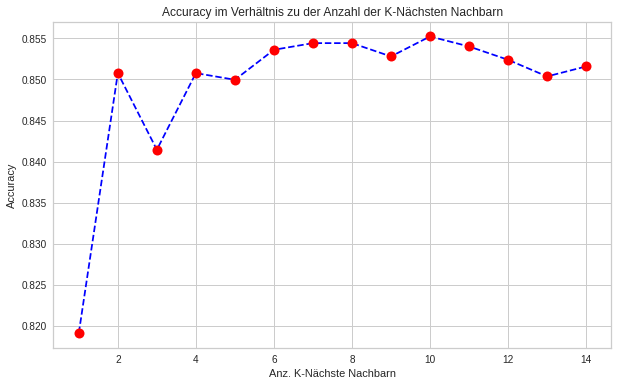

In [52]:
# Accuracy im Verhältnis zu der Anzahl der K-Nächsten Nachbarn

acc = []
for i in range(1,15,1):
    neigh = KNeighborsClassifier(metric='euclidean', weights = 'uniform', n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_val)
    acc.append(metrics.accuracy_score(y_val, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,15,1),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy im Verhältnis zu der Anzahl der K-Nächsten Nachbarn')
plt.xlabel('Anz. K-Nächste Nachbarn')
plt.ylabel('Accuracy')
print("Höhste Accuracy:-",max(acc),"bei K =",acc.index(max(acc)))


# Quelle: [19]

Die kleinste Fehlerrate und die höchste Accuracy liegen bei K = 9 Nachbarn.

## Erneute Evaluation des Modells nach Anpassung der Hyperparameter

In [53]:
# Generalisierten KNN-Klassifikator auf allen Trainingsdaten neu trainieren 
best_knn_clf = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9, weights = 'uniform')

best_knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [54]:
# Prediction / Vorhersage der Trainings- und Validierungsdaten, ob Umsatz generiert wird oder nicht
train_best_knn_clf = best_knn_clf.predict(X_train)
val_best_knn_clf = best_knn_clf.predict(X_val)

In [55]:
# Classification Report für opt_dt_clf und best_dt_clf anhand der Validierungsdaten
print(metrics.classification_report(y_val, val_opt_knn_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_best_knn_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.861     0.979     0.916      2055
 Vorhersage: Kauft etwas      0.667     0.209     0.319       411

                accuracy                          0.851      2466
               macro avg      0.764     0.594     0.617      2466
            weighted avg      0.829     0.851     0.817      2466

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.862     0.981     0.917      2055
 Vorhersage: Kauft etwas      0.690     0.212     0.324       411

                accuracy                          0.853      2466
               macro avg      0.776     0.596     0.621      2466
            weighted avg      0.833     0.853     0.819      2466



Die Anpassung der Anzahl der Nachbarn führt zu einem (minimal) besserem Ergebnis. 

## Threshold senken für einen höheren Recall

Der Threshold ist der Grenzwert, ab dem ein Label als „Kauf“ / „Kein Kauf“ klassifiziert wird. Defaultmäßig liegt dieser bei 0,5.
Im nächsten Schritt wird der Threshold gesenkt um den Recall-Wert für die Vorhersage: "Kauf" zu erhöhen.

In [56]:
# Probability / Wahrscheinlichkeit, ob der jeweilige Datensatz/Webseitenbesucher:in Umsatz erbringt oder nicht aufgrund der Validierungsdaten
val_pred_proba_knn = best_knn_clf.predict_proba(X_val)

In [57]:
# Prediction / Vorhersage der Validierungsdaten, ob Umsatz generiert wird oder nicht
val_pred_knn = best_knn_clf.predict(X_val)

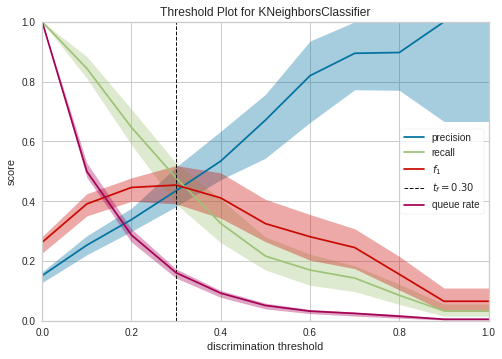

In [58]:
# Visualisierung der Kennzahlen & Diskriminierungsschwelle 
visualizer = DiscriminationThreshold(best_knn_clf)
visualizer.fit(X_train, y_train)
visualizer.show();

Der "discrimination threshold" zeigt an, wo der Threshold liegen muss für den besten F1 Score

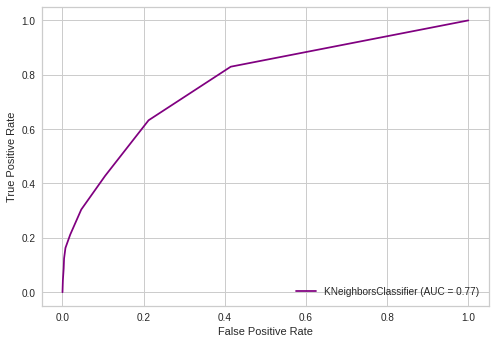

In [59]:
# ROC Kurve für die Validierungsdaten
plot_roc_curve(best_knn_clf, X_val, y_val, color='purple');

Die ROC Kurve zeigt die True Positive Rate (=Recall) in Abhängigkeit zu der False Positive Rate. Die beiden Raten verhalten sich umgekehrt proportional zueinander.  Da  die True Positive Rate erhöht werden soll, muss daher eine höhere False Positive Rate in Kauf genommen werden. 
Die AUC für die Validierungsdaten liegt bei 77 %

In [60]:
# AUC Fläche unter der ROC-Kurve für die predicted Validierungsdaten 
print("Die AUC für die vorhergesagten Validierungsdaten liegt bei: ", roc_auc_score(y_val, val_pred_knn))

Die AUC für die vorhergesagten Validierungsdaten liegt bei:  0.5963503649635037


In [61]:
# Grenzwert runtersetzen
val_threshold_knn = (val_pred_proba_knn[:,1]>0.30).astype(int)

Der Threshold wird auf 0,3 gesetzt. Das heißt alle Webseitenbesucher:innen die mit eine höheren Wahrscheinlichkeit als 30% etwas kaufen möchten werden als "Kauf" eingeordnet.

## Erneute Evaluation des Modells nach Senkung des Thresholds

In [62]:
# Classification Report für Trainings- und Validierungsdaten
print(metrics.classification_report(y_train, train_best_knn_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_best_knn_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_threshold_knn, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.889     0.986     0.935      6698
 Vorhersage: Kauft etwas      0.793     0.312     0.448      1193

                accuracy                          0.884      7891
               macro avg      0.841     0.649     0.691      7891
            weighted avg      0.875     0.884     0.861      7891

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.862     0.981     0.917      2055
 Vorhersage: Kauft etwas      0.690     0.212     0.324       411

                accuracy                          0.853      2466
               macro avg      0.776     0.596     0.621      2466
            weighted avg      0.833     0.853     0.819      2466

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.887     0.895     0.891      2055
 Vorhersage: Kauft etwas      0.449     0.428     0.438       411

  

Die Precision und die Accuarcy sind im letzten Schritt aufgrund des geringeren Thresholds gesunken. Dafür ist der Recall gestiegen. Da dieser Wert hier für Amazonja eine höhere Priorität haben sollte, wird das Modell so belassen.

## Performance des KNN Modells anhand der Testdaten prüfen

In [63]:
# Prediction / Vorhersage der Testdaten, ob Umsatz generiert wird oder nicht
knn_test_pred = best_knn_clf.predict(X_test)

In [64]:
# Probability / Wahrscheinlichkeit, ob Kund:in Umsatz generieren wird oder nicht
knn_test_pred_proba = best_knn_clf.predict_proba(X_test)

In [65]:
# Verringerung des Threshold
test_threshold_knn = (knn_test_pred_proba[:,1]>0.30).astype(int)

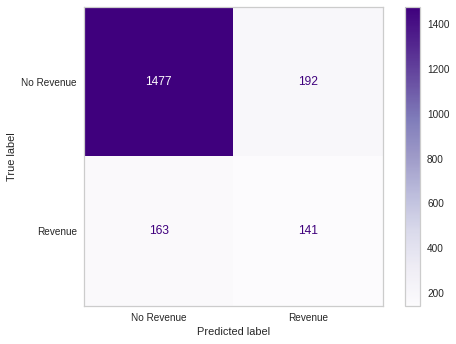

In [66]:
# Visualisierung Confusion Matrix
cm = metrics.confusion_matrix(y_test, test_threshold_knn)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No Revenue', 'Revenue'])
disp.plot(cmap="Purples")
plt.grid(False)

In [67]:
# Classification report für Testdaten
print(metrics.classification_report(y_test, test_threshold_knn, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.901     0.885     0.893      1669
 Vorhersage: Kauft etwas      0.423     0.464     0.443       304

                accuracy                          0.820      1973
               macro avg      0.662     0.674     0.668      1973
            weighted avg      0.827     0.820     0.823      1973



Die Accuracy des Modells ist geringer als die des Dummy Classifiers. Allerdings kommt das Modell dem Ziel der Kaufvorhersage durch den höheren Recall Wert näher.

# 5.3 DECISION TREE

Der Decision Tree ist ein einfach zu verstehender, überwachter Machine-Learning Algorithmus, der sowohl für Klassifikationen als auch für Regressionen verwendet werden kann und das Modell in Baumstruktur erstellt. Mithilfe von Wenn-Dann-Regeln werden die Daten in immer kleinere Strukturen zerlegt schließlich einem inkrementellen Entscheidungsbaum zugeordnet. [20]

Beispiel:
Im Bild ist ein Decision Tree zu sehen, der vorhersagt, ob es bewölkt (=cloudy) ist oder nicht. Im ersten Schritt wird nach der Eigenschaft „Wetter“ differenziert. Dieses kann hier „Sunny“, „Cloudy“ oder „Rainy“ sein. Ist das Wetter „Cloudy“, hat der Algorithmus sein Ziel schon erreicht. Ist es „Sunny“, wird als nächstes die Eigenschaft „Humidity“ angesehen. Ist diese hoch, wird das Element als nicht bewölkt/not cloudy klassifiziert, ist die Luftfeuchtigkeit (=humidity) normal, wird das Element als bewölkt/cloudy klassifiziert.
Ist das Wetter am Anfang „Rainy“ wird als nächstes nach der Eigenschaft „Wind“ differenziert. Ist dieser stark, wird das Element als nicht bewölkt/not cloudy klassifiziert. Ist der Wind schwach, wird das Element als bewölkt klassifiziert. 
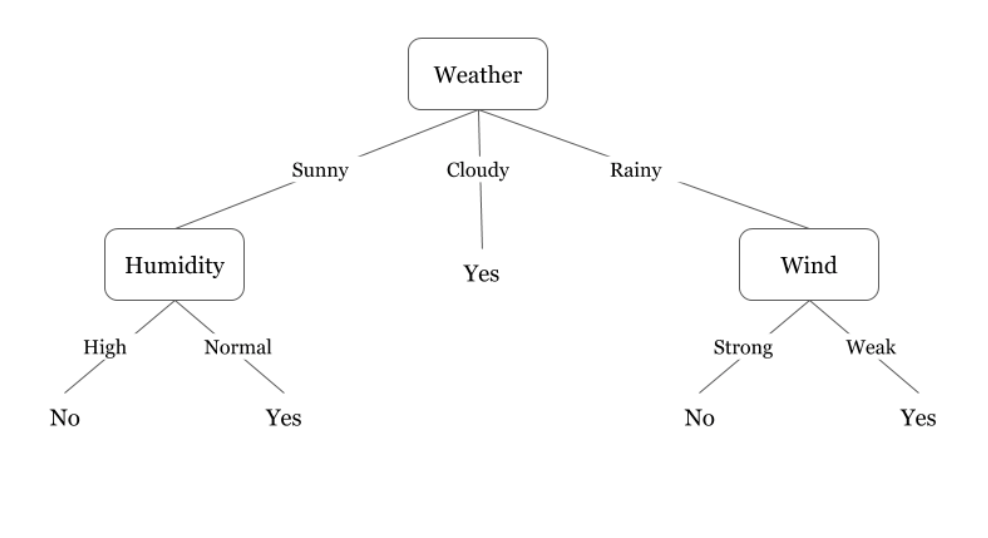



Bildquelle: [B3]

## Hyperparameteroptimierung mithilfe der GridSearch

Erklärung Hyperparameter / Parameter: siehe 5.2 "Hyperparameteroptimierung mithilfe der GridSearch"

Hyperparameter für den DecisionTree-Algorithmus sind:
* criterion
* max_depth
* min_samples_leaf
* min_samples_split
* max_features

In [68]:
# Hyperparameter Optimierung mit der GridSearch
tree_clf = DecisionTreeClassifier()

paramsTree = {'max_depth' : np.arange(1,10,1),           # Tiefe des DT
              'criterion' : ['gini', 'entropy'],         # Die Funktion zur Messung der Qualität einer Aufteilung. Unterstützte Kriterien sind "gini" für die Gini-Verunreinigung und "Entropie" für den Informationsgewinn
              'min_samples_leaf' : np.arange(1,6,1),     # Minimale Anzahl an Samples/Proben/Daten die für einen Abzweigung als Blatt (leaf node) benötigt werden
              'min_samples_split' : np.arange(1,10,1),   # Minimale Anzahl an Samples/Proben/Daten die für einen weiteren Split an einem Knoten (children node) benötigt werden
              'max_features' : np.arange(1,16,1)         # Maximale Anzahl an features die für den Split mit einbezogen werden 
             } 


tree_grid_clf = GridSearchCV(estimator = tree_clf,       # DecisionTreeClassifier wird übergeben
                             param_grid = paramsTree,    # Hyperparameter werden übergeben
                             scoring = 'accuracy',       # Scoring Parameter, bestimmt welche Kennzahl für die Evaluation genutzt wird
                             return_train_score = True,  # Kann zur weiteren Kontrolle genutzt werden (z.B. auf Over- und Underfitting)
                             verbose = 1,                # Um so größer die Zahl um so mehr Details/Nachrichten werden angezeigt
                             cv = 5,                     # Cross-Validation = 5
                             n_jobs = -1)                # -1 = Computer soll alle Prozessoren zur Berechnung nutzen

tree_grid_clf.fit(X_train, y_train)                      # Algorithmus wird mit Trainingsdaten trainiert

# Quelle: [21]

Fitting 5 folds for each of 12150 candidates, totalling 60750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 6680 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 12280 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 19480 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 28280 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 38680 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 50680 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 60750 out of 60750 | elapsed:  6.7min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [69]:
# Ergebnisse aus jedem Split
df_cv_results = pd.DataFrame(tree_grid_clf.cv_results_)

print(df_cv_results[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']])

      param_criterion param_max_depth param_min_samples_leaf  \
0                gini               1                      1   
1                gini               1                      1   
2                gini               1                      1   
3                gini               1                      1   
4                gini               1                      1   
...               ...             ...                    ...   
12145         entropy               9                      5   
12146         entropy               9                      5   
12147         entropy               9                      5   
12148         entropy               9                      5   
12149         entropy               9                      5   

      param_max_features  mean_test_score  
0                      1              NaN  
1                      1         0.857687  
2                      1         0.854642  
3                      1         0.848815  
4          

In [70]:
# Besten Grid Search Ergebnisse für Decision Tree
opt_tree_clf = tree_grid_clf.best_params_

print("Die optimierten Hyperparameter für den Dicision Tree sind: ")
for key, value in opt_tree_clf.items():
    print("     - "+key+": "+str(value))
    
print("Die höchste Accuracy aufgrund der Trainingsdaten mit diesen Hyperparametern liegt bei: ", tree_grid_clf.best_score_)

Die optimierten Hyperparameter für den Dicision Tree sind: 
     - criterion: entropy
     - max_depth: 5
     - max_features: 12
     - min_samples_leaf: 5
     - min_samples_split: 8
Die höchste Accuracy aufgrund der Trainingsdaten mit diesen Hyperparametern liegt bei:  0.9072363747570898


In [71]:
# Optimierten Hyperparameter werden an opt_dt_clf übergeben
opt_dt_clf = tree_grid_clf.best_estimator_

## Besten Klassifikator auf allen Trainingsdaten neu trainieren

In [72]:
# Trainieren des Algorithmus mit den Trainingsdaten
opt_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=12,
                       min_samples_leaf=5, min_samples_split=8)

In [73]:
# Prediction / Vorhersage der Trainingsdaten, ob Umsatz generiert wird oder nicht
train_opt_dt_clf = opt_dt_clf.predict(X_train)
print(train_opt_dt_clf[0:25])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [74]:
# Probability / Wahrscheinlichkeit, ob der jeweilige Datensatz/Webseitenbesucher:in Umsatz erbringt oder nicht aufgrund der Trainingsdaten
train_y_pred_proba = opt_dt_clf.predict_proba(X_train)
print(train_y_pred_proba[0:25])

[[1.         0.        ]
 [0.87980769 0.12019231]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.92932862 0.07067138]
 [0.92932862 0.07067138]
 [0.72271386 0.27728614]
 [0.94534413 0.05465587]
 [0.48854962 0.51145038]
 [1.         0.        ]
 [0.96348884 0.03651116]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.9752809  0.0247191 ]
 [1.         0.        ]
 [0.70588235 0.29411765]
 [0.72271386 0.27728614]
 [1.         0.        ]
 [0.81141439 0.18858561]
 [0.87980769 0.12019231]
 [0.4122807  0.5877193 ]]


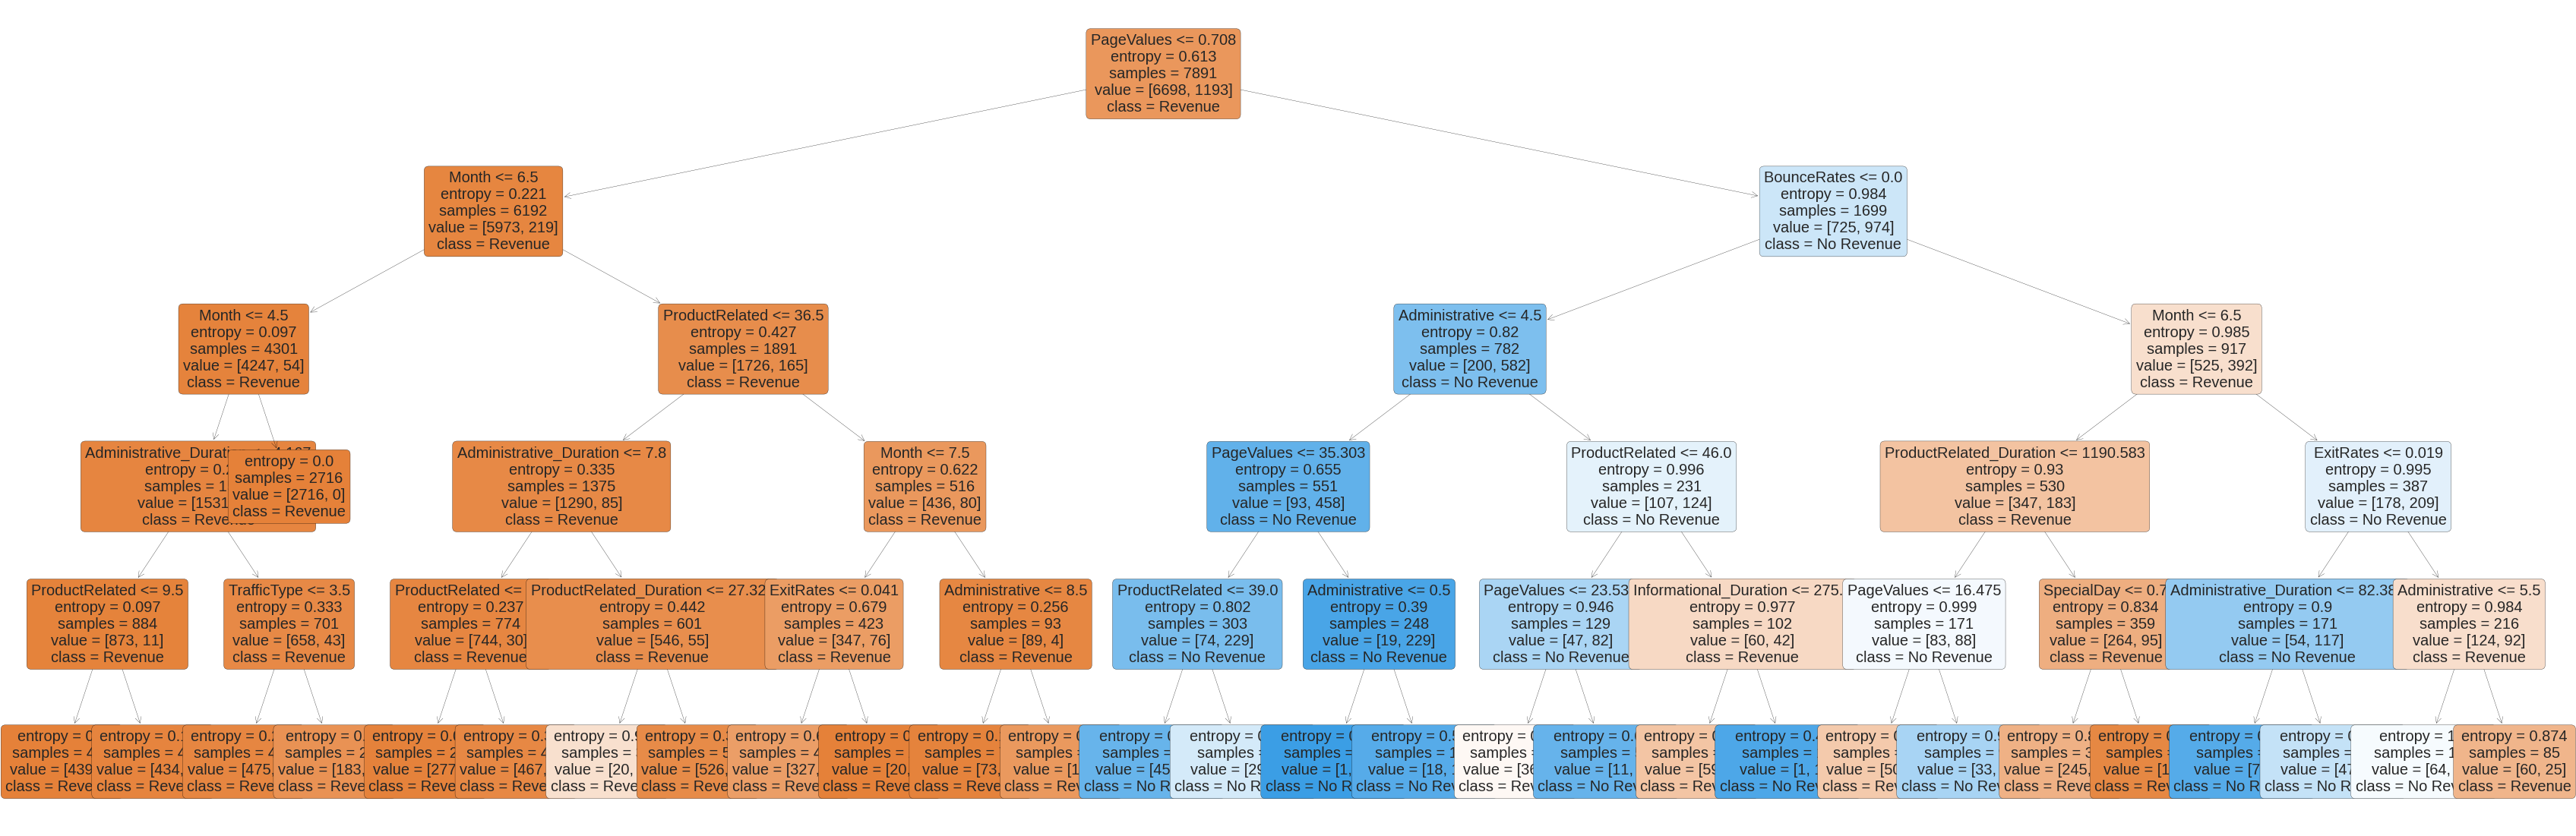

In [75]:
# Visualisierung Decision Tree
plt.figure(figsize=(60,20))
plot_tree(opt_dt_clf,feature_names=feature_names, class_names=['Revenue', 'No Revenue'], filled = True, rounded=True, fontsize=20)
plt.show();

## Evaluation des Modells anhand von Kennzahlen 

Vorlage für Vorgehensweise bei folgender Evaluierung: [18]

In [76]:
# Prediction / Vorhersage der Validierungsdaten, ob Umsatz generiert wird oder nicht
val_opt_dt_clf = opt_dt_clf.predict(X_val)

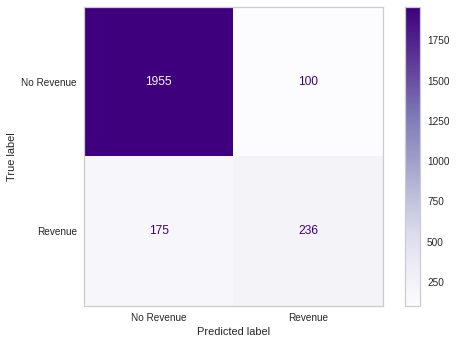

In [77]:
# Confusion Matrix Model aufgrund der Validierungsdaten
cm = metrics.confusion_matrix(y_val, val_opt_dt_clf)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No Revenue', 'Revenue'])
disp.plot(cmap="Purples")
plt.grid(False);

Wie zuvor sind die True-Positive und False-Negative Raten sehr hoch. Der Klassifikator sagt also in den meisten Fällen "Kein Kauf" vorher.

In [78]:
# Die vier Werte aus der Confusion Matrix werden einzeln gespeichert
confusion = metrics.confusion_matrix(y_val, val_opt_dt_clf)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [79]:
# Classification Accuracy: Wie oft liegt der Klassifikator prozentual richtig?
print ((TP+TN) /float(TP+TN+FP+FN))

0.8884833738848338


In [80]:
# Classification Error: Wie oft liegt der Klassifikator prozentual falsch?
print ((FP+FN) /float(TP+TN+FP+FN))

0.11151662611516626


In [81]:
# Precision/Positiver Vorhersagewert/Genauigkeit: Wie oft ist die Vorhersage prozentual richtig, wenn die Vorhersage lautet: "Umsatz"? 
print(TP/float(TP+FP))

0.7023809523809523


In [82]:
# Recall/Sensitivität/Sensitivity/Richtig-positiv-Rate/Trefferquote: Wie viele von den in Wirklichkeit positiven (=Umsatz) wurden prozentual positiv vorhergesagt?
print (TP / float(TP+FN))

0.5742092457420924


In [83]:
# Spezifität/Specificity/Richtig-negativ-Rate: Wie viele von den in Wirklichkeit negativen (=Kein Umsatz) wurden prozentual negativ vorhergesagt?
print(TN / float(TN+FP))

0.9513381995133819


In [84]:
# Falsch Positiv Rate: Wie oft ist die Vorhersage prozentual falsch, wenn die Vorhersage lautet: "Kein Umsatz"
print(FP/float(TN+FP))

0.04866180048661801


In [85]:
# Classification Report für Trainings- und Validierungsdaten
print(metrics.classification_report(y_train, train_opt_dt_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_opt_dt_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.937     0.962     0.949      6698
 Vorhersage: Kauft etwas      0.748     0.636     0.688      1193

                accuracy                          0.913      7891
               macro avg      0.842     0.799     0.818      7891
            weighted avg      0.908     0.913     0.910      7891

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.918     0.951     0.934      2055
 Vorhersage: Kauft etwas      0.702     0.574     0.632       411

                accuracy                          0.888      2466
               macro avg      0.810     0.763     0.783      2466
            weighted avg      0.882     0.888     0.884      2466



Die Accuracy für das DecisionTree-Modell liegt bei den Trainings- und Validierungsdaten jeweils im hohen 80%-Bereich/ niedrigem 90%-Bereich. Das liegt aber vor allem daran, dass der Datensatz unausgeglichen ist und die große Mehrheit der Webseitenbesucher:innen nichts kauft, was auch korrekt vorhergesagt wird. Da aber vor allem herausgefunden werden soll, welche Webseitenbesucher:innen etwas kaufen, ist es erforderlich den Recall-Wert für die Vorhersage "Kauft etwas" zu erhöhen, da lieber unentschlossene Webseitenbesucher:innen zu den Kund:innen gezählt werden sollen, als echte Kund:innen zu übersehen. 
Zudem sind DecisionTrees anfällig für Overfitting, daher wird das Modell im nächsten Schritt darauf geprüft.

## Hyperparamter generalisieren um Overfitting zu minimieren

Möglichkeiten um das Modell zu generalisieren:
* Verringerung der max_depth
* Erhöhung der min_samples_leaf
* Erhöhung der min_samples_split
* Entfernen von fehlerhaften Trainingsdaten
* Entfernen von (unrelevanten) Features

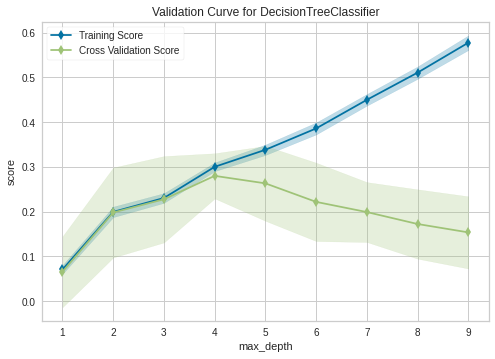

In [86]:
# Validation Curve
cv = 10
param_range = np.arange(1,10,1) #selbe Range wie GridSearchCV

viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth",
    param_range=param_range, cv=cv, scoring="r2", n_jobs=-1
);

viz.fit(X_train, y_train);
viz.show();

# Quelle: [22]

Die Validation Curve zeigt das Bestimmtheitsmaß (R2-Score) in Abhängigkeit zur Baumtiefe für die Trainingsdaten und die Cross Validation Ergbenisse. Das Bestimmtheitsmaß nimmt für die Trainingsdaten mit der Baumtiefe zu. Für die Cross Validation Ergebnisse nimmt das Bestimmtheitsmaß erst zu und ab einer Baumtiefe von 4 wieder ab.

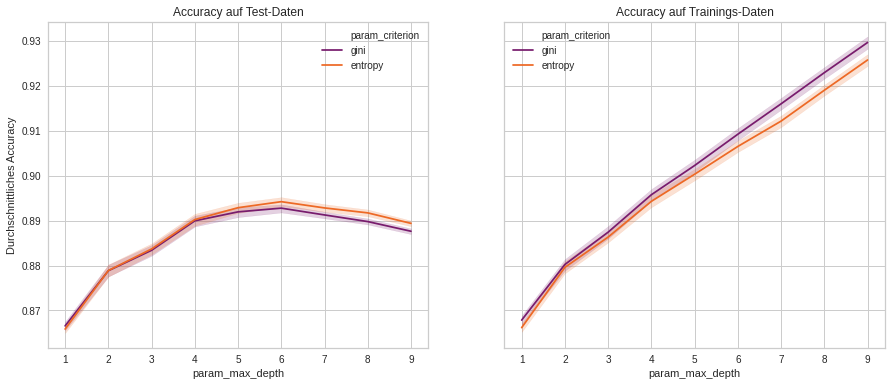

In [87]:
# Visualisierung der Accuarcy in Abhängigkeit zum Hyperparamter "Maximale Tiefe des Baumes"
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_criterion', palette = 'inferno', data=df_cv_results, ax=ax1)
ax1.set_title("Accuracy auf Test-Daten")
ax1.set(ylabel="Durchschnittliches Accuracy")
sns.lineplot(x='param_max_depth', y='mean_train_score', hue='param_criterion', palette = 'inferno', data=df_cv_results, ax=ax2)
ax2.set_title("Accuracy auf Trainings-Daten");

Die Accuracy für die Trainingsdaten nimmt mit der Tiefe des Baumes zu. Für die Testdaten nimmt die Accuracy bis zu einer Tiefe von 5 oder 6 zu (Schwankungen möglich) und nimmt danach langsam wieder ab. 5 ist daher eine gute Tiefe für den DecisionTree und muss nicht angepasst werden.

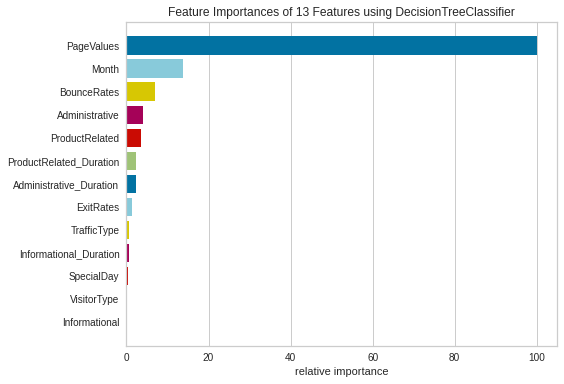

In [88]:
# Visualisierung der Wichtigkeit der Features
fi_viz = FeatureImportances(opt_dt_clf)
fi_viz.fit(X_val, y_val)
fi_viz.show();

Die unteren 5 Features sind unwichtig für die Vorhersage des DesicionTrees. 
Wäre der DecisionTree überangepasst, könnte man diese Features hier rausnehmen.

## Erneute Evaluation des Modells nach Generalisierung

In [89]:
# Generalisierten Decision Tree-Klassifikator auf allen Trainingsdaten neu trainieren 
best_dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_features = 12,  min_samples_leaf = 20, min_samples_split=20)

best_dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=12,
                       min_samples_leaf=20, min_samples_split=20)

In [90]:
# Prediction / Vorhersage der Trainings- und Validierungsdaten, ob Umsatz generiert wird oder nicht
train_best_dt_clf = best_dt_clf.predict(X_train)
val_best_dt_clf = best_dt_clf.predict(X_val)

In [91]:
# Classification Report für opt_dt_clf und best_dt_clf anhand der Validierungsdaten
print(metrics.classification_report(y_val, val_opt_dt_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_best_dt_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.918     0.951     0.934      2055
 Vorhersage: Kauft etwas      0.702     0.574     0.632       411

                accuracy                          0.888      2466
               macro avg      0.810     0.763     0.783      2466
            weighted avg      0.882     0.888     0.884      2466

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.921     0.948     0.935      2055
 Vorhersage: Kauft etwas      0.696     0.596     0.642       411

                accuracy                          0.889      2466
               macro avg      0.809     0.772     0.788      2466
            weighted avg      0.884     0.889     0.886      2466



Die Generalisierung führt zu (minimal) besseren Ergebnissen bei den Validierungsdaten.

## Threshold senken für einen höheren Recall

In [92]:
# Probability / Wahrscheinlichkeit, ob der jeweilige Datensatz/Webseitenbesucher:in Umsatz erbringt oder nicht aufgrund der Validierungsdaten
val_pred_proba_dt = best_dt_clf.predict_proba(X_val)

In [93]:
# Prediction / Vorhersage der Validierungsdaten, ob Umsatz generiert wird oder nicht
val_pred_dt = best_dt_clf.predict(X_val)

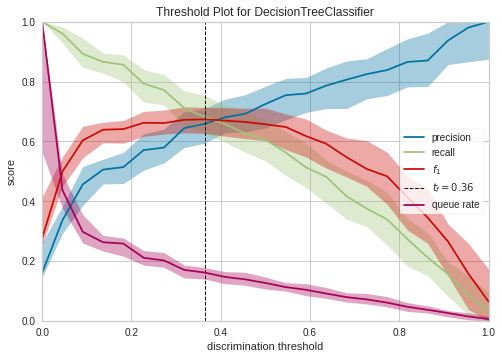

In [94]:
# Visualisierung der Kennzahlen & Diskriminierungsschwelle 
visualizer = DiscriminationThreshold(best_dt_clf)
visualizer.fit(X_train, y_train)
visualizer.show();

Der optimale discrimination threshold liegt um die 0,3 (Schwankungen möglich).

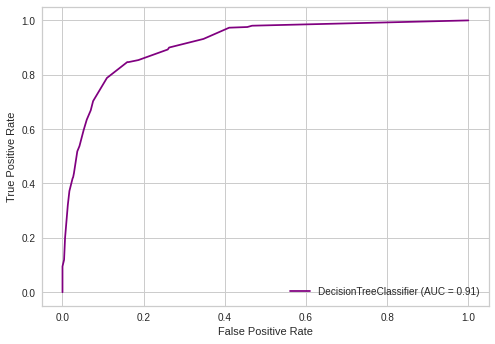

In [95]:
# ROC Kurve
plot_roc_curve(best_dt_clf, X_val, y_val, color='purple');

Nach der ROC-Curve könnte mit einer False Positive Rate von 20 % eine True Positive Rate um die 85-90 % erreicht werden. Da der Datensatz aber sehr ungleich verteilt ist, würde das in absoluten Zahlen bedeuten, dass ca. doppelt so viele "False-Positives" wie "True-Positives" Klassifiziert werden würden. Der Threshold wurde daher auf 0,3 gesetzt, womit ca. 65 % True-Positives und weniger als 10% False Positives bestimmt werden. 
Dies könnte man je nach Unternehmensstrategie von Amazonja noch anpassen. 

In [96]:
# AUC Fläche unter der ROC-Kurve
print("Die AUC für die vorhergesagten Validierungsdaten liegt bei: ", roc_auc_score(y_val, val_pred_dt))

Die AUC für die vorhergesagten Validierungsdaten liegt bei:  0.7720194647201947


In [97]:
# Grenzwert runtersetzen
val_threshold_dt = (val_pred_proba_dt[:,1]>0.3).astype(int)

Der Threshold wird auf 0,3 gesetzt. Das heißt alle Webseitenbesucher:innen die mit eine höheren Wahrscheinlichkeit als 30% etwas kaufen möchten werden als "Käufer:in" eingeordnet.

## Erneute Evaluation des Modells nach Senkung des Thresholds

In [98]:
# Classification Report für Trainings- und Validierungsdaten
print(metrics.classification_report(y_train, train_best_dt_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_best_dt_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_threshold_dt, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.941     0.958     0.949      6698
 Vorhersage: Kauft etwas      0.738     0.662     0.698      1193

                accuracy                          0.913      7891
               macro avg      0.840     0.810     0.824      7891
            weighted avg      0.910     0.913     0.911      7891

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.921     0.948     0.935      2055
 Vorhersage: Kauft etwas      0.696     0.596     0.642       411

                accuracy                          0.889      2466
               macro avg      0.809     0.772     0.788      2466
            weighted avg      0.884     0.889     0.886      2466

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.934     0.930     0.932      2055
 Vorhersage: Kauft etwas      0.658     0.669     0.663       411

  

Die Precision ist im letzten Schritt aufgrund des geringeren Thresholds gesunken. Dafür ist der Recall gestiegen. Da dieser Wert hier für Amazonja eine höhere Priorität haben sollte, wird das Modell so belassen.

## Performance des Decision Tree Modells anhand der Testdaten prüfen

In [99]:
# Prediction / Vorhersage der Testdaten, ob Umsatz generiert wird oder nicht
dt_test_pred = best_dt_clf.predict(X_test)

In [100]:
# Probability / Wahrscheinlichkeit, ob Kund:in Umsatz generieren wird oder nicht
dt_test_pred_proba = best_dt_clf.predict_proba(X_test)

In [101]:
# Verringerung des Threshold
test_threshold_dt = (dt_test_pred_proba[:,1]>0.3).astype(int)

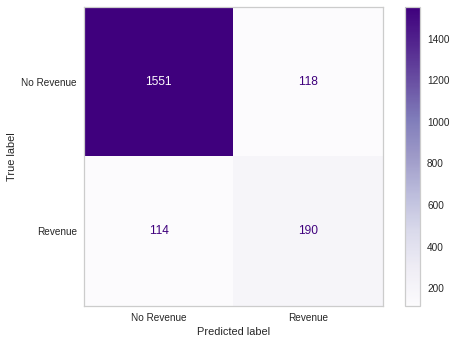

In [102]:
# Visualisierung Confusion Matrix
cm = metrics.confusion_matrix(y_test, test_threshold_dt)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No Revenue', 'Revenue'])
disp.plot(cmap="Purples")
plt.grid(False);

In [103]:
# Classification report für Testdaten
print(metrics.classification_report(y_test, test_threshold_dt, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.932     0.929     0.930      1669
 Vorhersage: Kauft etwas      0.617     0.625     0.621       304

                accuracy                          0.882      1973
               macro avg      0.774     0.777     0.776      1973
            weighted avg      0.883     0.882     0.883      1973



Das Modell wurde für die Bedürfnisse von Amazonja optimiert und weist eine Accuracy im hohen 80%-Bereich auf.

# 5.4 RANDOM FOREST 

Der Random Forest ist ein robuster, überwachter Machine-Learning Algorithmus, der sowohl für Klassifikationen als auch für Regressionen verwendet werden kann. 
Dieser Algorithmus erstellt zufällig einen Wald mit mehreren Bäumen (Decision Trees).
Grundsätzlich ist ein Wald robuster, je mehr Bäume er hat. Das gleiche gilt für den Random Forest, je mehr Bäume dieser hat, desto robuster wird er und desto genauer sind die erbrachten Ergebnisse. [23]

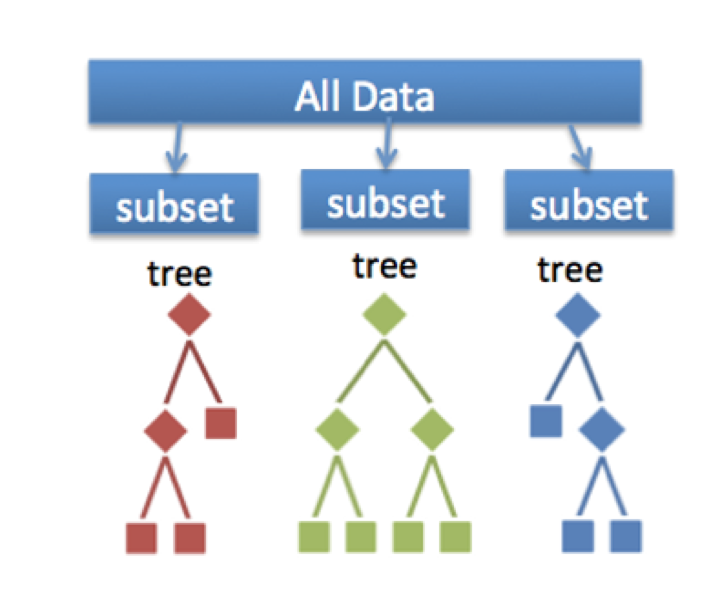



Bildquelle: [B4]

## Hyperparameteroptimierung mithilfe der GridSearch

Erklärung Hyperparameter / Parameter: siehe 5.2 "Hyperparameteroptimierung mithilfe der GridSearch"

Hyperparameter für den Random Forest-Algorithmus sind:
* criterion
* max_depth
* min_samples_split

*Anmerkung: Grundsätzlich gibt es mehr Hyperparameter für den Random Forest, die aber aufgrund von einer zu hohen Berechnungszeit weggelassen wurden.*

In [104]:
forest = RandomForestClassifier()

paramsForest = {'criterion' : ['gini', 'entropy'],       # Die Funktion zur Messung der Qualität einer Aufteilung. Unterstützte Kriterien sind "gini" für die Gini-Verunreinigung und "Entropie" für den Informationsgewinn
                'max_depth' : np.arange(1,10,1),         # Tiefe des DT
                'min_samples_split' : np.arange(1,10,1)} # Minimale Anzahl an Samples/Proben/Daten die für einen weiteren Split an einem Knoten (children node) benötigt werden


forest_grid_clf = GridSearchCV(estimator = forest,       # RandomForestClassifier wird übergeben
                             param_grid = paramsForest,  # Hyperparameter werden übergeben
                             scoring = 'accuracy',             # Scoring Parameter, bestimmt welche Kennzahl für die Evaluation genutzt wird
                             return_train_score = True,  # Kann zur weiteren Kontrolle genutzt werden (z.B. auf Over- und Underfitting)
                             verbose = 1,                # um so größer die Zahl um so mehr Details/Nachrichten werden angezeigt
                             cv = 5,                     # Cross-Validation = 5
                             n_jobs = -1)                # -1 = Computer soll alle Prozessoren zur Berechnung nutzen

forest_grid_clf.fit(X_train, y_train)

# Quellen: [24][25]

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [105]:
# Ergebnisse aus jeden Split 
df_cv_results = pd.DataFrame(forest_grid_clf.cv_results_)

print(df_cv_results[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'mean_test_score']])

    param_criterion param_max_depth param_min_samples_split  mean_test_score
0              gini               1                       1              NaN
1              gini               1                       2         0.848815
2              gini               1                       3         0.848815
3              gini               1                       4         0.848815
4              gini               1                       5         0.848815
..              ...             ...                     ...              ...
157         entropy               9                       5         0.908377
158         entropy               9                       6         0.908630
159         entropy               9                       7         0.908123
160         entropy               9                       8         0.908250
161         entropy               9                       9         0.909391

[162 rows x 4 columns]


In [106]:
# Besten Grid Search Ergebnisse für Random Forest
opt_forest_clf = forest_grid_clf.best_params_

print("Die optimierten Hyperparameter für den Random Forest sind: ")
for key, value in opt_forest_clf.items():
    print("     - "+key+": "+str(value))
    
print("Die höchste Accuracy aufgrund der Trainingsdaten mit diesen Hyperparametern liegt bei: ", forest_grid_clf.best_score_)

Die optimierten Hyperparameter für den Random Forest sind: 
     - criterion: gini
     - max_depth: 9
     - min_samples_split: 3
Die höchste Accuracy aufgrund der Trainingsdaten mit diesen Hyperparametern liegt bei:  0.9107844482919433


In [107]:
# Optimierten Hyperparameter werden an opt_rf_clf übergeben
opt_rf_clf = forest_grid_clf.best_estimator_

## Besten Klassifikator auf allen Trainingsdaten neu trainieren

In [108]:
# Trainieren des Algorithmus mit den Trainingsdaten
opt_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=3)

In [109]:
# Prediction / Vorhersage der Trainingsdaten, ob Umsatz generiert wird oder nicht
train_opt_rf_clf = opt_rf_clf.predict(X_train)
print(train_opt_rf_clf[0:25])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [110]:
# Probability / Wahrscheinlichkeit, ob der jeweilige Datensatz/Webseitenbesucher:in Umsatz erbringt oder nicht aufgrund der Trainingsdaten
train_pred_proba_forest = opt_rf_clf.predict_proba(X_train)
print(train_pred_proba_forest[0:25])

[[9.96142116e-01 3.85788428e-03]
 [9.63635430e-01 3.63645696e-02]
 [9.99793551e-01 2.06448828e-04]
 [9.90833104e-01 9.16689584e-03]
 [9.99358702e-01 6.41297962e-04]
 [9.60140478e-01 3.98595219e-02]
 [9.99651755e-01 3.48244998e-04]
 [9.31032776e-01 6.89672238e-02]
 [7.72425037e-01 2.27574963e-01]
 [6.66354316e-01 3.33645684e-01]
 [9.80041488e-01 1.99585117e-02]
 [7.36857423e-01 2.63142577e-01]
 [9.68769985e-01 3.12300146e-02]
 [9.55043773e-01 4.49562271e-02]
 [9.94826505e-01 5.17349478e-03]
 [9.93658544e-01 6.34145598e-03]
 [9.58576566e-01 4.14234340e-02]
 [9.97514497e-01 2.48550322e-03]
 [9.95139163e-01 4.86083727e-03]
 [6.62684588e-01 3.37315412e-01]
 [6.90184889e-01 3.09815111e-01]
 [9.99825312e-01 1.74687762e-04]
 [8.69115501e-01 1.30884499e-01]
 [6.98299934e-01 3.01700066e-01]
 [5.65963474e-01 4.34036526e-01]]


## Evaluation des Modells anhand von Kennzahlen 

Vorlage für Vorgehensweise bei folgender Evaluierung: [18]

In [111]:
# Prediction / Vorhersage der Validierungsdaten, ob Umsatz generiert wird oder nicht
val_opt_rf_clf = opt_rf_clf.predict(X_val)

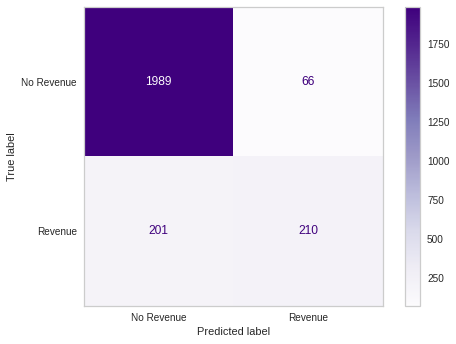

In [112]:
# Confusion Matrix Model aufgrund der Validierungsdaten
cm = metrics.confusion_matrix(y_val, val_opt_rf_clf)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No Revenue', 'Revenue'])
disp.plot(cmap="Purples")
plt.grid(False);

Wie zuvor sind die True-Positive und False-Negative Raten sehr hoch. Der Klassifikator sagt also in den meisten Fällen "Kein Kauf" vorher.

In [113]:
# Die vier Werte aus der Confusion Matrix werden einzeln gespeichert
confusion = metrics.confusion_matrix(y_val, val_opt_rf_clf)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [114]:
# Classification Accuracy: Wie oft liegt der Klassifikator prozetual richtig?
print ((TP+TN) /float(TP+TN+FP+FN))

0.8917274939172749


In [115]:
# Classification Error: Wie oft liegt der Klassifikator prozetual falsch?
print ((FP+FN) /float(TP+TN+FP+FN))

0.10827250608272507


In [116]:
# Precision/Positiver Vorhersagewert/Genauigkeit: Wie oft ist die Vorhersage prozentual richtig, wenn die Vorhersage lautet: "Umsatz"? 
print(TP/float(TP+FP))

0.7608695652173914


In [117]:
# Recall/Sensitivität/Sensitivity/Richtig-positiv-Rate/Trefferquote: Wie viele von den in Wirklichkeit positiven (=Umsatz) wurden prozentual positiv vorhergesagt?
print (TP / float(TP+FN))

0.5109489051094891


In [118]:
# Spezifität/Specificity/Richtig-negativ-Rate: Wie viele von den in Wirklichkeit negativen (=Kein Umsatz) wurden prozentual negativ vorhergesagt?
print(TN / float(TN+FP))

0.9678832116788321


In [119]:
# Falsch Positiv Rate: Wie oft ist die Vorhersage prozentual falsch, wenn die Vorhersage lautet: "Kein Umsatz"
print(FP/float(TN+FP))

0.032116788321167884


In [120]:
# Classification Report für Trainings- und Validierungsdaten
print(metrics.classification_report(y_train, train_opt_rf_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_opt_rf_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.950     0.988     0.969      6698
 Vorhersage: Kauft etwas      0.913     0.708     0.798      1193

                accuracy                          0.946      7891
               macro avg      0.931     0.848     0.883      7891
            weighted avg      0.944     0.946     0.943      7891

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.908     0.968     0.937      2055
 Vorhersage: Kauft etwas      0.761     0.511     0.611       411

                accuracy                          0.892      2466
               macro avg      0.835     0.739     0.774      2466
            weighted avg      0.884     0.892     0.883      2466



Die Accuracy für das RandomForest-Modell liegt bei den Trainings- und Validierungsdaten jeweils im hohen 80%-Bereich/ niedrigem 90%-Bereich. Das liegt aber vor allem daran, dass der Datensatz unausgeglichen ist und die große Mehrheit der Webseitenbesucher:innen nichts kauft, was auch korrekt vorhergesagt wird. Da aber vor allem herausgefunden werden soll, welche Webseitenbesucher:innen etwas kaufen, ist es erforderlich den Recall-Wert für die Vorhersage "Kauft etwas" zu erhöhen, da lieber unentschlossene Webseitenbesucher:innen zu den Kund:innen gezählt werden sollen, als echte Kund:innen zu übersehen. 
Zudem sind RandomForests anfällig für Overfitting, daher wird das Modell im nächsten Schritt darauf geprüft.

## Hyperparamter generalisieren um Overfitting zu minimieren

Möglichkeiten um das Modell zu generalisieren:

* Verringerung der max_depth
* Erhöhung der min_samples_split
* Entfernen von fehlerhaften Trainingsdaten
* Entfernen von (unrelevanten) Features

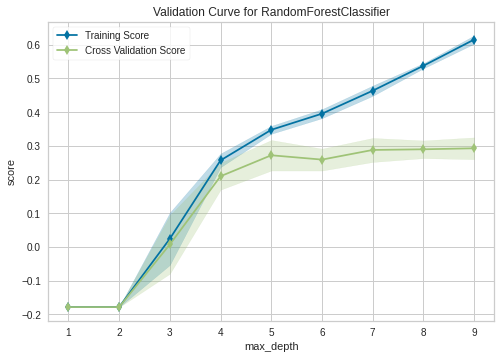

In [121]:
# Validation Curve
cv = 5
param_range = np.arange(1,10,1) #selbe Range wie GridSearchCV

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=param_range, cv=cv, scoring="r2", n_jobs=-1
);

viz.fit(X_train, y_train);
viz.show();

# Quelle:[22]

Die Validation Curve zeigt das Bestimmtheitsmaß (R2-Score) in Abhängigkeit zur Baumtiefe für die Trainingsdaten und die Cross Validation Ergbenisse. Das Bestimmtheitsmaß nimmt für die Trainingsdaten mit der Baumtiefe zu. Für die Cross Validation Ergebnisse nimmt das Bestimmtheitsmaß erst zu und bleibt ab einer Baumtiefe von 5 ungefähr gleich. Die Baumtiefe sollte daher nicht tiefer als 5 sein, um Overfitting zu vermeiden.

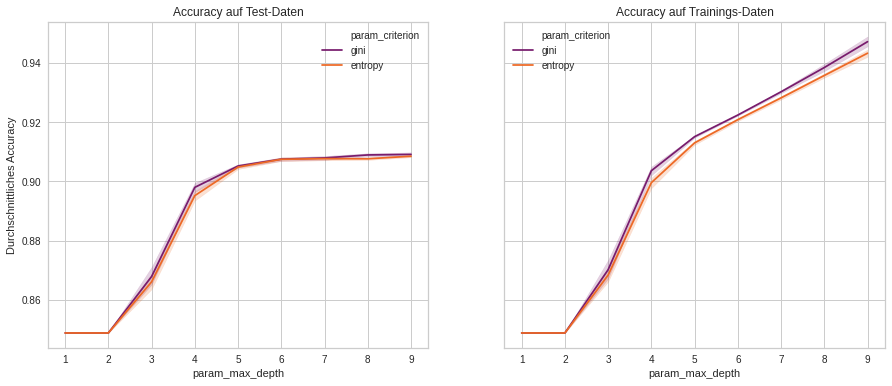

In [122]:
# Visualisierung der Accuarcy in Abhängigkeit zum Hyperparamter "Maximale Tiefe des Baumes"
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
sns.lineplot(x='param_max_depth', y='mean_test_score', hue='param_criterion', palette = 'inferno', data=df_cv_results, ax=ax1)
ax1.set_title("Accuracy auf Test-Daten")
ax1.set(ylabel="Durchschnittliches Accuracy")
sns.lineplot(x='param_max_depth', y='mean_train_score', hue='param_criterion', palette = 'inferno', data=df_cv_results, ax=ax2)
ax2.set_title("Accuracy auf Trainings-Daten");

Die Accuracy für die Trainingsdaten nimmt mit der Tiefe des Baumes zu. Für die Testdaten nimmt die Accuracy bis zu einer Tiefe von 5 oder 6 zu (Schwankungen möglich) und bleibt danach in etwa gleich. 5 ist daher eine gute Tiefe für den RandomForest und wird im nächsten Schritt darauf angepasst.

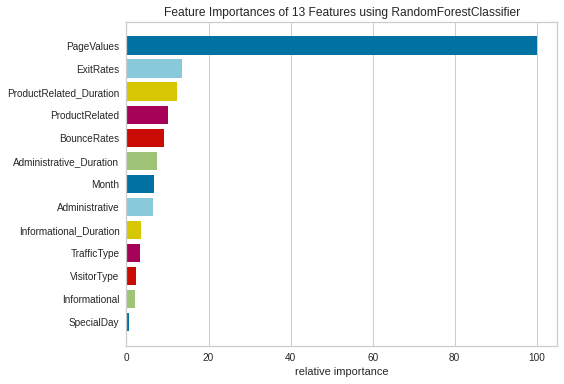

In [123]:
# Visualisierung der Wichtigkeit der Features
fi_viz = FeatureImportances(opt_rf_clf)
fi_viz.fit(X_val, y_val)
fi_viz.show();

Im Gegensatz zum DecisionTree haben beim RandomForest alle Features eine gewisse Wichtigkeit und damit eine Auswirkung aufs Ergebnis.

## Erneute Evaluation des Modells nach Generalisierung

In [124]:
# Generalisierten Random Forest-Klassifikator auf allen Trainingsdaten neu trainieren 
best_rf_clf = RandomForestClassifier(criterion = 'gini', max_depth = 6, min_samples_split=7)

best_rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=7)

In [125]:
# Prediction / Vorhersage der Trainings- und Validierungsdaten, ob Umsatz generiert wird oder nicht
train_best_rf_clf = best_rf_clf.predict(X_train)
val_best_rf_clf = best_rf_clf.predict(X_val)

In [126]:
# Classification Report für opt_dt_clf und best_dt_clf anhand der Validierungsdaten
print(metrics.classification_report(y_val, val_opt_rf_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_best_rf_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.908     0.968     0.937      2055
 Vorhersage: Kauft etwas      0.761     0.511     0.611       411

                accuracy                          0.892      2466
               macro avg      0.835     0.739     0.774      2466
            weighted avg      0.884     0.892     0.883      2466

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.904     0.971     0.936      2055
 Vorhersage: Kauft etwas      0.771     0.484     0.595       411

                accuracy                          0.890      2466
               macro avg      0.838     0.728     0.766      2466
            weighted avg      0.882     0.890     0.880      2466



Die Generalisierung führt zu (minimal) schlechteren Ergebnissen bei den Validierungsdaten, da wir aber Overfitting in Zukunft vermeiden wollen, wird der generalisierte Classifier so belassen wie er ist. 

## Threshold senken für einen höheren Recall

In [127]:
# Probability / Wahrscheinlichkeit, ob der jeweilige Datensatz/Webseitenbesucher:in Umsatz erbringt oder nicht aufgrund der Validierungsdaten
val_pred_proba_rf = opt_rf_clf.predict_proba(X_val)

In [128]:
val_pred_rf = opt_rf_clf.predict(X_val)

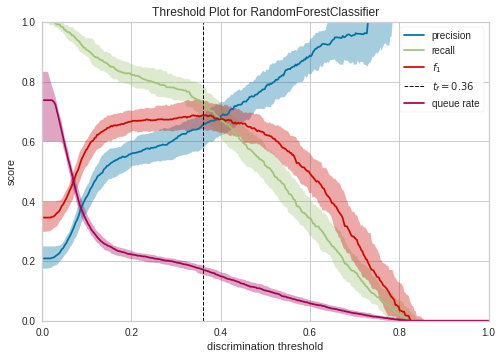

In [129]:
# Visualisierung der Kennzahlen & Diskriminierungsschwelle 
visualizer = DiscriminationThreshold(best_rf_clf)
visualizer.fit(X_train, y_train)
visualizer.show();

Der optimale discrimination threshold liegt um die 0,35 (Schwankungen möglich).

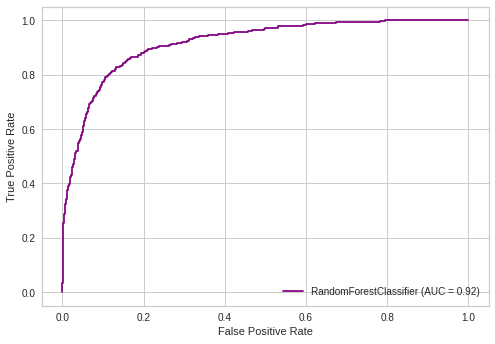

In [130]:
# ROC Kurve
plot_roc_curve(best_rf_clf, X_val, y_val, color='purple');

Nach der ROC-Curve könnte mit einer False Positive Rate von 20 % eine True Positive Rate um die 85-90 % erreicht werden. Da der Datensatz aber sehr ungleich verteilt ist, würde das in absoluten Zahlen bedeuten, dass ca. doppelt so viele "False-Positives" wie "True-Positives" Klassifiziert werden würden. Der Threshold wurde daher auf 0,35 gesetzt, womit ca. 65% - 70% True-Positives und weniger als 10% False Positives bestimmt werden. 
Dies könnte man je nach Unternehmensstrategie von Amazonja noch anpassen. 

In [131]:
# AUC für die vorhergesagten Validierungsdaten
print("Die AUC für die vorhergesagten Validierungsdaten beträgt: ", roc_auc_score(y_val, val_pred_rf))

Die AUC für die vorhergesagten Validierungsdaten beträgt:  0.7394160583941606


In [132]:
# Grenzwert runtersetzen
val_threshold_rf = (val_pred_proba_rf[:,1]>0.35).astype(int)

Der Threshold wird auf 0,35 gesetzt. Das heißt alle Webseitenbesucher:innen die mit eine höheren Wahrscheinlichkeit als 35% etwas kaufen möchten werden als "Käufer:in" eingeordnet.

## Erneute Evaluation des Modells nach Senkung des Thresholds

In [133]:
# Classification Report für Trainings- und Validierungsdaten
print(metrics.classification_report(y_train, train_best_rf_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_best_rf_clf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))
print(metrics.classification_report(y_val, val_threshold_rf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3))

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.930     0.981     0.955      6698
 Vorhersage: Kauft etwas      0.847     0.584     0.691      1193

                accuracy                          0.921      7891
               macro avg      0.888     0.783     0.823      7891
            weighted avg      0.917     0.921     0.915      7891

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.904     0.971     0.936      2055
 Vorhersage: Kauft etwas      0.771     0.484     0.595       411

                accuracy                          0.890      2466
               macro avg      0.838     0.728     0.766      2466
            weighted avg      0.882     0.890     0.880      2466

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.941     0.923     0.932      2055
 Vorhersage: Kauft etwas      0.648     0.708     0.677       411

  

Die Precision ist im letzten Schritt aufgrund des geringeren Thresholds gesunken. Dafür ist der Recall gestiegen. Da dieser Wert hier für Amazonja eine höhere Priorität haben sollte, wird das Modell so belassen.

## Performance des Random Forest Modells anhand der Testdaten prüfen

In [134]:
# Prediction / Vorhersage der Testdaten, ob Umsatz generiert wird oder nicht
rf_test_pred = best_rf_clf.predict(X_test)

In [135]:
# Probability / Wahrscheinlichkeit, ob Kund:in Umsatz generieren wird oder nicht
rf_test_pred_proba = best_rf_clf.predict_proba(X_test)

In [136]:
# Verringerung des Threshold
test_threshold_rf =(rf_test_pred_proba[:,1]>0.35).astype(int)

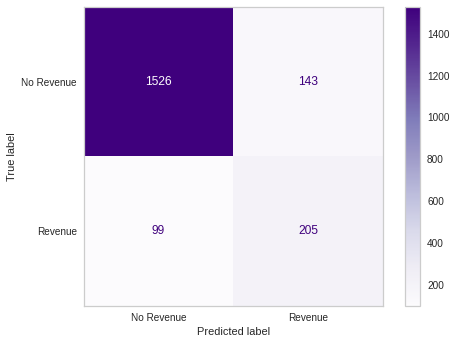

In [137]:
# Visualisierung Confusion Matrix
cm = metrics.confusion_matrix(y_test, test_threshold_rf)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['No Revenue', 'Revenue'])
disp.plot(cmap="Purples")
plt.grid(False);

In [138]:
# Classification report für Testdaten
report = metrics.classification_report(y_test, rf_test_pred, digits = 3)
print(report)

              precision    recall  f1-score   support

           0      0.914     0.971     0.942      1669
           1      0.760     0.500     0.603       304

    accuracy                          0.899      1973
   macro avg      0.837     0.736     0.773      1973
weighted avg      0.890     0.899     0.890      1973



Das Modell wurde für die Bedürfnisse von Amazonja optimiert und weist eine Accuracy im hohen 80%-Bereich auf.

# 6. Modellevaluierung

In [139]:
# Prediction / Vorhersage der Tesdaten, ob Umsatz generiert wird oder nicht
y_pred_dummy = dummy_clf.predict(X_test)

In [140]:
# Classification Report Dummy Classifier
print(metrics.classification_report(y_test, y_pred_dummy, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3));

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.846     1.000     0.917      1669
 Vorhersage: Kauft etwas      0.000     0.000     0.000       304

                accuracy                          0.846      1973
               macro avg      0.423     0.500     0.458      1973
            weighted avg      0.716     0.846     0.775      1973



In [141]:
# Classification Report KNN
print(metrics.classification_report(y_test, test_threshold_knn, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3));

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.901     0.885     0.893      1669
 Vorhersage: Kauft etwas      0.423     0.464     0.443       304

                accuracy                          0.820      1973
               macro avg      0.662     0.674     0.668      1973
            weighted avg      0.827     0.820     0.823      1973



In [142]:
# Classification Report Decision Tree
print(metrics.classification_report(y_test, test_threshold_dt, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3));

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.932     0.929     0.930      1669
 Vorhersage: Kauft etwas      0.617     0.625     0.621       304

                accuracy                          0.882      1973
               macro avg      0.774     0.777     0.776      1973
            weighted avg      0.883     0.882     0.883      1973



In [143]:
# Classification Report Random Forest
print(metrics.classification_report(y_test, test_threshold_rf, target_names=['Vorhersage: Kauft nichts', 'Vorhersage: Kauft etwas'], digits=3));

                          precision    recall  f1-score   support

Vorhersage: Kauft nichts      0.939     0.914     0.927      1669
 Vorhersage: Kauft etwas      0.589     0.674     0.629       304

                accuracy                          0.877      1973
               macro avg      0.764     0.794     0.778      1973
            weighted avg      0.885     0.877     0.881      1973



Das Decision Tree Modell weißt die besten Ergebnisse für Amzonja auf, dicht gefolgt vom Random Forest Modell. (Schwankungen möglich, in seltenen Fällen übertrifft das Random Forest Modell sogar das Decision Tree Modell.)

# 7. Möglicher Geschäftseinsatz

### Welches Modell erbringt die besten Ergebnisse für die Vorhersage der Kaufentscheidung?

Der DecisionTree und der RandomForest eignen sich beide! Der DecisionTree ist in den meisten Fällen etwas besser, daher würden wir empfehlen dieses Modell anzuwenden.

### Welche Genauigkeit kann man bei der Vorhersage erwarten?

Die Genauigkeit liegt beim DecisionTree um die 80 %, dabei sagt er eher vorher, dass jemand etwas kauft, der/die nichts kauft als andersherum. Dies ist daher von Vorteil, da potenzielle Kund:innen nicht übersehen werden und es so weniger entgangenen Gewinne gibt.

### Wie würde das Modell dem Unternehmen Amazonja helfen?

Das Modell hilft dem Unternehmen vorherzusehen, ob ein:e Webseitenbesucher:in etwas kauft oder nicht. Auf dieser Grundlage kann das Unternehmen informierte und datengetriebene Marketing- und Angebotsentscheidungen treffen.

### Wie kann Amazonja diese Informationen sinnvoll einsetzen? 

Amazonja kann mit den Informationen gezieltes und personalisiertes Marketing betreiben. Unentschlossene, potenzielle Kund:innen können erkannt und 
z.B. durch Neukunden-Angebote dazugewonnen werden. 
Dadurch kann die Konversionsrate (Sales-Kennzahl) insgesamt erhöht und der Umsatz von dem Süßwaren-Onlineshop Amazonja gesteigert werden.

# Bildquellen

[B1] Bearbeitet, Ursprünglich: Retail TouchPoints (2018): Only 17% Of Consumers Browse With Intent To Purchase On First E-Commerce Site Visit - Retail TouchPoints. Online verfügbar unter https://retailtouchpoints.com/topics/digital-commerce/only-17-of-consumers-browse-with-intent-to-purchase-on-first-e-commerce-site-visit, zuletzt aktualisiert am 30.01.2021, zuletzt geprüft am 31.01.2021.

[B2] Ausschnitt von Glassner 2018: 6 Klassifikation. Vorlesungsfolien von Prof. Dr. Roland Müller, S. 33. Online verfügbar unter https://moodle.hwr-berlin.de/course/view.php?id=57789, zuletzt geprüft am 31.01.2021.

[B3] 8 Entscheidungsbaum. Vorlesungsfolien von Prof. Dr. Roland Müller. Online verfügbar unter https://moodle.hwr-berlin.de/course/view.php?id=57789, zuletzt geprüft am 31.01.2021.

[B4] Lateef, Zulaikha (2014): A Comprehensive Guide To Random Forest In R. In: Edureka, 19.09.2014. Online verfügbar unter https://www.edureka.co/blog/random-forest-classifier/, zuletzt geprüft am 31.01.2021.


# Inhaltliche Quellen

[1] C. Okan Sakar, Yomi Kastro (2019): Online Shopper's Intention. Online verfügbar unter https://www.kaggle.com/roshansharma/online-shoppers-intention, zuletzt aktualisiert am 23.05.2019, zuletzt geprüft am 31.01.2021.

[2] Huber, Thomas: Microsoft Word - Seminararbeit Palka.doc. Online verfügbar unter https://www.vertrieb-strategie.de/5-faktoren-die-das-kaufverhalten-online-beeinflussen/, zuletzt geprüft am 26.12.2020.

[3] Kaufverhalten: So wirkt Werbung auf Kaufentscheidungen. Online verfügbar unter https://blog.sellwerk.de/kaufverhalten/, zuletzt geprüft am 26.12.2020.

[4] 5 Faktoren, die das Kaufverhalten online beeinflussen. Online verfügbar unter https://www.vertrieb-strategie.de/5-faktoren-die-das-kaufverhalten-online-beeinflussen/, zuletzt geprüft am 26.12.2020. (SEO-united.de 2021)

[5] Was ist Exit Rate - Definition & Bedeutung - SEO united Glossar. (2021): Online verfügbar unter https://www.seo-united.de/glossar/exit-rate/, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[6] How Page Value is calculated - Analytics Help. (2021): Online verfügbar unter https://support.google.com/analytics/answer/2695658?hl=en, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[7] Roggio, Armando (2011): Understanding ‘Traffic Sources’ in Google Analytics. In: Practical Ecommerce, 18.07.2011. Online verfügbar unter https://www.practicalecommerce.com/Understanding-Traffic-Sources-in-Google-Analytics, zuletzt geprüft am 31.01.2021.

[8] Bishop, Christopher M. (2009): Pattern recognition and machine learning. Corrected at 8th printing 2009. New York, NY: Springer (Information science and statistics).

[9] codebasics (2021): Machine Learning Tutorial Python - 6: Dummy Variables & One Hot Encoding - YouTube. Online verfügbar unter https://www.youtube.com/watch?v=9yl6-HEY7_s, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[10] Data Science Stack Exchange, User: Hendrik (2021): machine learning - Train/Test/Validation Set Splitting in Sklearn - Data Science Stack Exchange. Online verfügbar unter https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[11] Classification Report — Yellowbrick v1.2.1 documentation (2021). Online verfügbar unter https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html, zuletzt aktualisiert am 15.01.2021, zuletzt geprüft am 31.01.2021.

[12] Brownlee, Jason (2018): How to Use ROC Curves and Precision-Recall Curves for Classification in Python. In: Machine Learning Mastery, 30.08.2018. Online verfügbar unter https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/, zuletzt geprüft am 31.01.2021.

[13] ancud.it: Einführung in Machine Learning mit Python — K Nearest Neighbours. Online verfügbar unter https://medium.com/@ancud.it/einf%C3%BChrung-in-der-machine-learning-mit-python-7a1b5e98be47, zuletzt geprüft am 31.01.2021.

[14] Nyuytiymbiy, Kizito (2020): Parameters, Hyperparameters, Machine Learning | Towards Data Science. In: Towards Data Science, 30.12.2020. Online verfügbar unter https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac, zuletzt geprüft am 31.01.2021.

[15] 9 Hyper Parameter Optimization. Vorlesungsfolien von Prof. Dr. Roland Müller. Online verfügbar unter https://moodle.hwr-berlin.de/course/view.php?id=57789, zuletzt geprüft am 31.01.2021.

[16] Erik G. (2018): k-Neighbors Classifier with GridSearchCV Basics, zuletzt aktualisiert am 21.10.2018, zuletzt geprüft am 31.01.2021.

[17] sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.24.1 documentation (2021). Online verfügbar unter https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[18] Data School (2021): How to evaluate a classifier in scikit-learn - YouTube. Online verfügbar unter https://www.youtube.com/watch?v=85dtiMz9tSo, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[19] Band, Amey (2020): How to find the optimal value of K in KNN? - Towards Data Science. In: Towards Data Science, 23.05.2020. Online verfügbar unter https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb, zuletzt geprüft am 31.01.2021.

[20] Lateef, Zulaikha (2019): A Complete Guide On Decision Tree Algorithm. In: Edureka, 15.03.2019. Online verfügbar unter https://www.edureka.co/blog/decision-tree-algorithm/, zuletzt geprüft am 31.01.2021.

[21] sklearn.tree.DecisionTreeClassifier — scikit-learn 0.24.1 documentation (2021). Online verfügbar unter https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[22] Validation Curve — Yellowbrick v1.2.1 documentation (2021). Online verfügbar unter https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html, zuletzt aktualisiert am 15.01.2021, zuletzt geprüft am 31.01.2021.

[23] Lateef, Zulaikha (2014): A Comprehensive Guide To Random Forest In R. In: Edureka, 19.09.2014. Online verfügbar unter https://www.edureka.co/blog/random-forest-classifier/, zuletzt geprüft am 31.01.2021.

[24] sklearn.ensemble.RandomForestClassifier — scikit-learn 0.24.1 documentation (2021). Online verfügbar unter https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html, zuletzt aktualisiert am 31.01.2021, zuletzt geprüft am 31.01.2021.

[25] Ben Fenison (2018): GridSearching a Random Forest Classifier, zuletzt aktualisiert am 18.10.2018, zuletzt geprüft am 31.01.2021.